<a href="https://colab.research.google.com/github/beserk561/notes_collab/blob/main/Live_Alex_Functional_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
from torchvision import models, transforms 
import requests 
from PIL import Image 
import torch.nn.functional as F

#define alexnet model  
alexnet = models.alexnet(pretrained=True).cuda(0)  
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

#transform image for use in model    
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

#load the image from its url    
url = 'https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322868_1100-732x549.jpg'     
img = Image.open(requests.get(url, stream=True).raw)       
img_t = preprocess(img).unsqueeze_(0).cuda(0)       

#classify the image with alexnet      
scores, class_idx = alexnet(img_t).max(1)          
print('Predicted class:', labels[class_idx.item()])

Predicted class: Brittany spaniel


In [ ]:
# labels

In [ ]:
w0 = alexnet.features[0].weight.data
w1 = alexnet.features[3].weight.data
w2 = alexnet.features[6].weight.data
w3 = alexnet.features[8].weight.data
w4 = alexnet.features[10].weight.data
w5 = alexnet.classifier[1].weight.data
w6 = alexnet.classifier[4].weight.data
w7 = alexnet.classifier[6].weight.data

In [ ]:
w = [w0,w1,w2,w3,w4,w5,w6,w7]

In [ ]:
torch.save(w, 'Hahn_Alex.pt')

In [ ]:
w = torch.load('Hahn_Alex.pt')

In [ ]:
[w0,w1,w2,w3,w4,w5,w6,w7] = w

In [ ]:
[w0,w1,w2,w3,w4,w5,w6,w7] = torch.load('Hahn_Alex.pt')

In [ ]:
img_t

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)

f5 = F.max_pool2d(f4,kernel_size=3, stride=2, padding=0, dilation=1)

f6 = F.conv2d(f5, w2, stride=1, padding=1)

f7 = F.relu(f6)

f8 = F.conv2d(f7, w3, stride=1, padding=1)

f9 = F.relu(f8)

f10 = F.conv2d(f9, w4, stride=1, padding=1)

f11 = F.relu(f10)

f12 = F.max_pool2d(f11, kernel_size=3, stride=2, padding=0, dilation=1)

f13 = F.adaptive_avg_pool2d(f12,output_size=6).flatten()

f14 = F.linear(f13,w5)

f15 = F.relu(f14)

f16 = F.linear(f15,w6)

f17 = F.relu(f16)

f18 = F.linear(f17,w7)

out = f18.argmax().item()

labels[out]

'golden retriever'

In [ ]:
f18.argmax()

tensor(207, device='cuda:0')

In [ ]:
labels[207]

'golden retriever'

In [ ]:
ls -l

total 238644
-rw-r--r-- 1 root root 244364579 Feb  5 00:20 Hahn_Alex.pt
drwxr-xr-x 1 root root      4096 Feb  2 14:40 sample_data/


In [ ]:
######
###
#

In [ ]:
def C1(x,w):
    return F.conv2d(x, w, stride=4, padding=2)

In [ ]:
def R(x):
    return F.relu(x)

In [ ]:
def M(x):
    return F.max_pool2d(x, kernel_size=3, stride=2, padding=0, dilation=1)

In [ ]:
def C2(x,w):
    return F.conv2d(x, w, stride=1, padding=2)

In [ ]:
def C3(x,w):
    return F.conv2d(x, w, stride=1, padding=1)

In [ ]:
def A(x):
    return F.adaptive_avg_pool2d(x,output_size=6).flatten()

In [ ]:
def L(x,w):
    return F.linear(x,w)

In [ ]:
f0 = C1(img_t, w0)

f1 = R(f0)

f2 = M(f1)

f3 = C2(f2, w1)

f4 = R(f3)

f5 = M(f4)

f6 = C3(f5,w2)

f7 = R(f6)

f8 = C3(f7,w3)

f9 = R(f8)

f10 = C3(f9,w4)

f11 = R(f10)

f12 = M(f11)

f13 = A(f12)

f14 = L(f13,w5)

f15 = R(f14)

f16 = L(f15,w6)

f17 = R(f16)

f18 = L(f17,w7)

out = f18.argmax().item()

labels[out]

'golden retriever'

In [ ]:
####################

In [ ]:
f0 = C1(img_t, w0)
f1 = R(f0)
f2 = M(f1)
f3 = C2(f2, w1)
f4 = R(f3)
f5 = M(f4)
f6 = C3(f5,w2)
f7 = R(f6)
f8 = C3(f7,w3)
f9 = R(f8)
f10 = C3(f9,w4)
f11 = R(f10)
f12 = M(f11)
f13 = A(f12)
f14 = L(f13,w5)
f15 = R(f14)
f16 = L(f15,w6)
f17 = R(f16)
f18 = L(f17,w7)

out = f18.argmax().item()

labels[out]

'golden retriever'

In [ ]:
f0 = C1(img_t, w0)
f1 = R(C1(img_t, w0))
f2 = M(R(C1(img_t, w0)))
f3 = C2(M(R(C1(img_t, w0))), w1)
f4 = R(C2(M(R(C1(img_t, w0))), w1))
f5 = M(R(C2(M(R(C1(img_t, w0))), w1)))
f6 = C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)
f7 = R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2))
f8 = C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)
f9 = R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3))
f10 = C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)
f11 = R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4))
f12 = M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))
f13 = A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4))))
f14 = L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5)
f15 = R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5))
f16 = L(R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5)),w6)
f17 = R(L(R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5)),w6))
f18 = L(R(L(R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5)),w6)),w7)

out = f18.argmax().item()

labels[out]

'golden retriever'

In [ ]:
f18 = L(R(L(R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t,w0))),w1))),w2)),w3)),w4)))),w5)),w6)),w7)

out = f18.argmax().item()

labels[out]

'golden retriever'

In [ ]:
w0.shape,w1.shape

# Notes

In [ ]:
w1 = alexnet.features[0].weight.data.cpu().numpy()

In [ ]:
w1.shape

(64, 3, 11, 11)

In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for i in [0,3,6,8,10]:
    
    w = alexnet.features[i].weight.data.cpu().numpy()
    print(w.shape)
    plot(w[0,0,:,:])

In [ ]:
for i in [1,4,6]:
    
    w = alexnet.classifier[i].weight.data.cpu().numpy()
    print(w.shape)
    plot(w[:100,:100])

In [ ]:
import torch.nn.functional as F

In [ ]:
img_t

In [ ]:
F.conv2d()

In [ ]:
F.relu()

In [ ]:
F.max_pool2d(input, kernel_size, stride=None, padding=0, dilation=1)

In [ ]:
img_t.shape

torch.Size([1, 3, 224, 224])

In [ ]:
alexnet.features[0](img_t).cpu().detach().numpy().shape

(1, 64, 55, 55)

In [ ]:
w0 = alexnet.features[0].weight.data
w1 = alexnet.features[3].weight.data
w2 = alexnet.features[6].weight.data
w3 = alexnet.features[8].weight.data
w4 = alexnet.features[10].weight.data
w5 = alexnet.classifier[1].weight.data
w6 = alexnet.classifier[4].weight.data
w7 = alexnet.classifier[6].weight.data

In [ ]:
w0.shape

torch.Size([64, 3, 11, 11])

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

In [ ]:
alexnet.classifier[0:7](alexnet.avgpool(alexnet.features[0:13](img_t)).flatten())

torch.Size([1000])

In [ ]:
alexnet.classifier[0:7](alexnet.avgpool(alexnet.features[0:13](img_t)).flatten()).argmax()

tensor(207, device='cuda:0')

In [ ]:
labels[207]

'golden retriever'

In [ ]:
labels[alexnet.classifier[0:7](alexnet.avgpool(alexnet.features[0:13](img_t)).flatten()).argmax().item()]

'golden retriever'

In [ ]:
labels[alexnet.classifier[0:7](alexnet.avgpool(alexnet.features[1:13](f0)).flatten()).argmax().item()]

'golden retriever'

In [ ]:
labels[alexnet.classifier[0:7](F.adaptive_avg_pool2d(alexnet.features[1:13](f0),output_size=6).flatten()).argmax().item()]

'golden retriever'

In [ ]:
labels[alexnet.classifier[0:7](F.adaptive_avg_pool2d(alexnet.features[1:13](f0),output_size=6).flatten()).argmax().item()]

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f_conv = alexnet.features[2:13](f1)

fL = F.adaptive_avg_pool2d(f_conv,output_size=6).flatten()

labels[alexnet.classifier[0:7](fL).argmax().item()]

'chow, chow chow'

In [ ]:
########################

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f_conv = alexnet.features[3:13](f2)

fL = F.adaptive_avg_pool2d(f_conv,output_size=6).flatten()

out = alexnet.classifier[0:7](fL)

labels[out.argmax().item()]

'Tibetan mastiff'

In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)



f_conv = alexnet.features[5:13](f4)

fL = F.adaptive_avg_pool2d(f_conv,output_size=6).flatten()

out = alexnet.classifier[0:7](fL)

labels[out.argmax().item()]

'chow, chow chow'

In [ ]:
####
####

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)

f5 = F.max_pool2d(f4,kernel_size=3, stride=2, padding=0, dilation=1)



f_conv = alexnet.features[6:13](f5)

fL = F.adaptive_avg_pool2d(f_conv,output_size=6).flatten()

out = alexnet.classifier[0:7](fL)

labels[out.argmax().item()]

In [ ]:
##################
##################

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)

f5 = F.max_pool2d(f4,kernel_size=3, stride=2, padding=0, dilation=1)

f6 = F.conv2d(f5, w2, stride=1, padding=1)


f_conv = alexnet.features[7:13](f6)

fL = F.adaptive_avg_pool2d(f_conv,output_size=6).flatten()

out = alexnet.classifier[0:7](fL)

labels[out.argmax().item()]

'golden retriever'

In [ ]:
############

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)

f5 = F.max_pool2d(f4,kernel_size=3, stride=2, padding=0, dilation=1)

f6 = F.conv2d(f5, w2, stride=1, padding=1)

f7 = F.relu(f6)

f8 = F.conv2d(f7, w3, stride=1, padding=1)

f9 = F.relu(f8)

f10 = F.conv2d(f9, w4, stride=1, padding=1)



f_conv = alexnet.features[11:13](f10)

fL = F.adaptive_avg_pool2d(f_conv,output_size=6).flatten()

out = alexnet.classifier[0:7](fL)

labels[out.argmax().item()]

'chow, chow chow'

In [ ]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
######### ####

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)

f5 = F.max_pool2d(f4,kernel_size=3, stride=2, padding=0, dilation=1)

f6 = F.conv2d(f5, w2, stride=1, padding=1)

f7 = F.relu(f6)

f8 = F.conv2d(f7, w3, stride=1, padding=1)

f9 = F.relu(f8)

f10 = F.conv2d(f9, w4, stride=1, padding=1)

f11 = F.relu(f10)


f_conv = alexnet.features[12:13](f11)

fL = F.adaptive_avg_pool2d(f_conv,output_size=6).flatten()

out = alexnet.classifier[0:7](fL)

labels[out.argmax().item()]

'golden retriever'

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)

f5 = F.max_pool2d(f4,kernel_size=3, stride=2, padding=0, dilation=1)

f6 = F.conv2d(f5, w2, stride=1, padding=1)

f7 = F.relu(f6)

f8 = F.conv2d(f7, w3, stride=1, padding=1)

f9 = F.relu(f8)

f10 = F.conv2d(f9, w4, stride=1, padding=1)

f11 = F.relu(f10)

f12 = F.max_pool2d(f11, kernel_size=3, stride=2, padding=0, dilation=1)


f_conv = alexnet.features[13:13](f12)

fL = F.adaptive_avg_pool2d(f_conv,output_size=6).flatten()

out = alexnet.classifier[0:7](fL)

labels[out.argmax().item()]

'golden retriever'

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)

f5 = F.max_pool2d(f4,kernel_size=3, stride=2, padding=0, dilation=1)

f6 = F.conv2d(f5, w2, stride=1, padding=1)

f7 = F.relu(f6)

f8 = F.conv2d(f7, w3, stride=1, padding=1)

f9 = F.relu(f8)

f10 = F.conv2d(f9, w4, stride=1, padding=1)

f11 = F.relu(f10)

f12 = F.max_pool2d(f11, kernel_size=3, stride=2, padding=0, dilation=1)

f13 = F.adaptive_avg_pool2d(f12,output_size=6).flatten()

out = alexnet.classifier[0:7](f13)

labels[out.argmax().item()]

'Sussex spaniel'

In [ ]:
## ## ## ##

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

f1 = F.relu(f0)

f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)

f5 = F.max_pool2d(f4,kernel_size=3, stride=2, padding=0, dilation=1)

f6 = F.conv2d(f5, w2, stride=1, padding=1)

f7 = F.relu(f6)

f8 = F.conv2d(f7, w3, stride=1, padding=1)

f9 = F.relu(f8)

f10 = F.conv2d(f9, w4, stride=1, padding=1)

f11 = F.relu(f10)

f12 = F.max_pool2d(f11, kernel_size=3, stride=2, padding=0, dilation=1)

f13 = F.adaptive_avg_pool2d(f12,output_size=6).flatten()

f14 = F.linear(f13,w5)

f15 = F.relu(f14)

f16 = F.linear(f15,w6)

f17 = F.relu(f16)

out = F.linear(f17,w7)


labels[out.argmax().item()]

'golden retriever'

In [ ]:
! wget -q "https://tinyurl.com/HahnImports"
exec(open("HahnImports").read())

##[Tensorspace](https://tensorspace.org/html/playground/alexnet.html)

![alt text](https://miro.medium.com/max/750/1*IlzW43-NtJrwqtt5Xy3ISA.jpeg)

![alt text](https://d3i71xaburhd42.cloudfront.net/38211dc39e41273c0007889202c69f841e02248a/2-Figure1-1.png)

![alt text](https://i.stack.imgur.com/XBWc3.png)

![alt text](https://cv-tricks.com/wp-content/uploads/2017/03/alexnet_small-1.png)

![alt text](https://www.learnopencv.com/wp-content/uploads/2017/11/convolution-example-matrix.gif)

<img src="https://production-media.paperswithcode.com/methods/MaxpoolSample2.png">

<img src=https://ujwlkarn.files.wordpress.com/2016/08/giphy.gif width="900">


In [ ]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="blue: red; font-weight: bold;">' +
          'click here to stop the video</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; 
      captureCanvas.height = 480; 
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame() {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
  
            

      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
def scale(x):
    return (x - np.min(x))/np.max(x)
def scale1(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x,cmap='gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
net = alexnet(pretrained=True).cuda(0)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [ ]:
filename = take_photo()
print('Saved to {}'.format(filename))

<IPython.core.display.Javascript object>

Saved to photo.jpg


In [ ]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

In [ ]:
im = imageio.imread('photo.jpg')

In [ ]:
plot(im)

In [ ]:
image = Image.fromarray(im) #convert to pil

In [ ]:
img_tensor = preprocess(image)

In [ ]:
img_tensor.shape

torch.Size([3, 224, 224])

In [ ]:
img_tensor = img_tensor[None,:,:,:]

In [ ]:
img_tensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
img_variable = torch.tensor(img_tensor).cuda(0)

<ipython-input-18-a3c4eb55103d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [ ]:
img_variable.shape

torch.Size([1, 3, 224, 224])

In [ ]:
out = net(img_variable)

In [ ]:
%%timeit
out = net(img_variable)

1.55 ms ± 3.39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
out.shape

In [ ]:
out.cpu().data.numpy().argmax()

In [ ]:
label_index = out.cpu().data.numpy().argmax()

In [ ]:
label_index

453

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

In [ ]:
top_list

array([453, 424, 454, 737, 617, 648, 860, 620, 509, 582])

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [ ]:
labels

In [ ]:
labels[800]

'slot, one-armed bandit'

In [ ]:
print(labels[label_index])

bookcase


In [ ]:
for i in range(10):
    print(labels[top_list[i]])

bookcase
barbershop
bookshop, bookstore, bookstall
pop bottle, soda bottle
lab coat, laboratory coat
medicine chest, medicine cabinet
tobacco shop, tobacconist shop, tobacconist
laptop, laptop computer
confectionery, confectionary, candy store
grocery store, grocery, food market, market


In [ ]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(net, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()

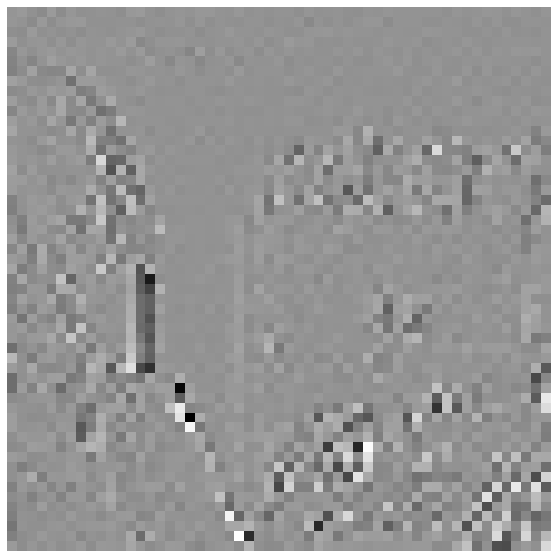

In [ ]:
plot(out[0,12,:,:])

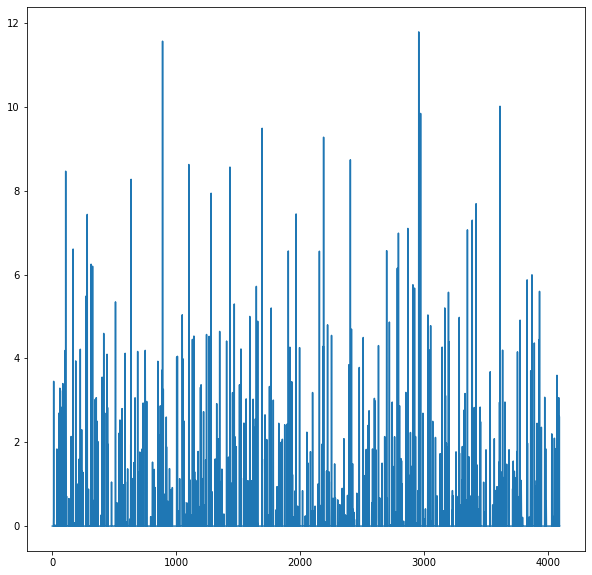

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

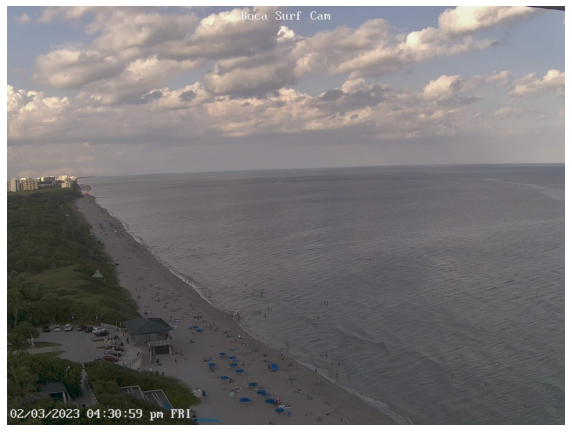

In [ ]:
plot(im)

In [ ]:
def load_im(im):
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image)
    img_tensor = img_tensor.unsqueeze_(0)
    img_variable = torch.tensor(img_tensor).cuda(0)
    return img_variable

In [ ]:
out = net(load_im(im))

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [ ]:
def inference(im):
    out = net(load_im(im))
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
    for i in range(10):
        print(labels[top_list[i]])

In [ ]:
inference(im)

volcano
sandbar, sand bar
valley, vale
radio telescope, radio reflector
wing
seashore, coast, seacoast, sea-coast
promontory, headland, head, foreland
lakeside, lakeshore
suspension bridge
balloon


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [ ]:
w1 = net.features[0].weight.data.cpu().numpy()

In [ ]:
w1.shape

(64, 3, 11, 11)

In [ ]:
w1 = np.transpose(w1,(0,2,3,1))

In [ ]:
w1.shape

(64, 11, 11, 3)

In [ ]:
Wp = (w1 - np.mean(w1))/np.std(w1)

In [ ]:
M = montage(Wp, multichannel=True)

In [ ]:
M.shape

(88, 88, 3)

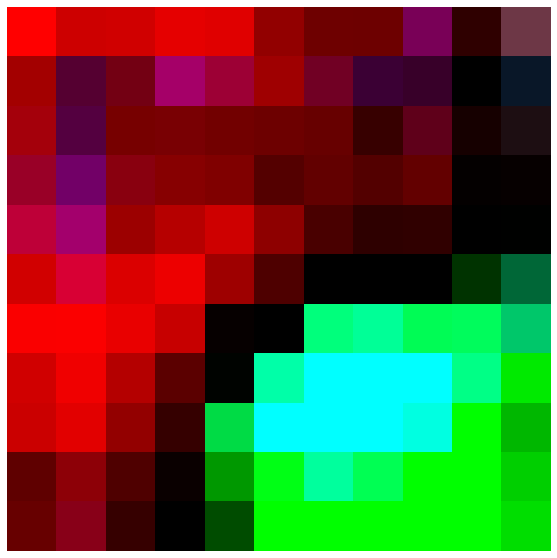

In [ ]:
plot(Wp[0,:,:,:])

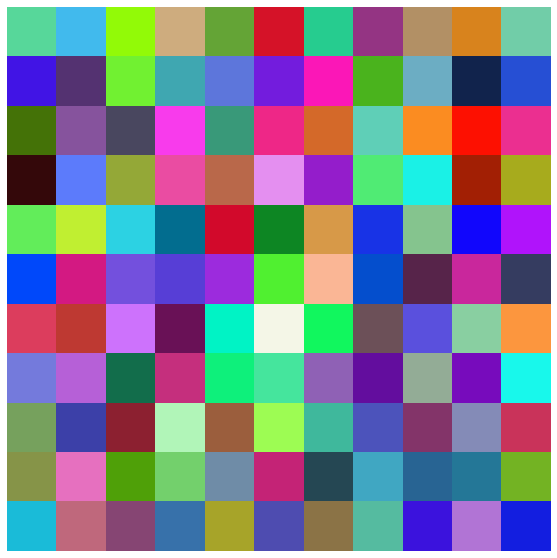

In [ ]:
plot(np.random.random((11,11,3)))

In [ ]:
def plot(x):

    if torch.is_tensor(x):
        x = x.cpu().detach().numpy()
        

    if len(x.shape)>3:
        if x.shape[3] == 3:
            x = montage(x, multichannel=True) 
        else:
            x = montage(x, multichannel=False)       

    fig, ax = plt.subplots()
    im = ax.imshow(x,cmap='gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

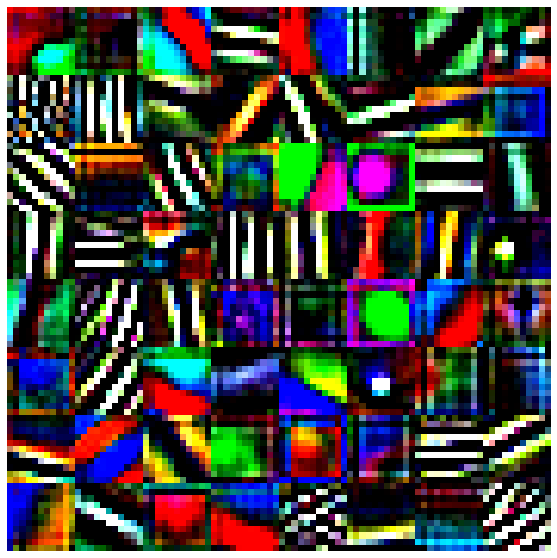

In [ ]:
plot(Wp)

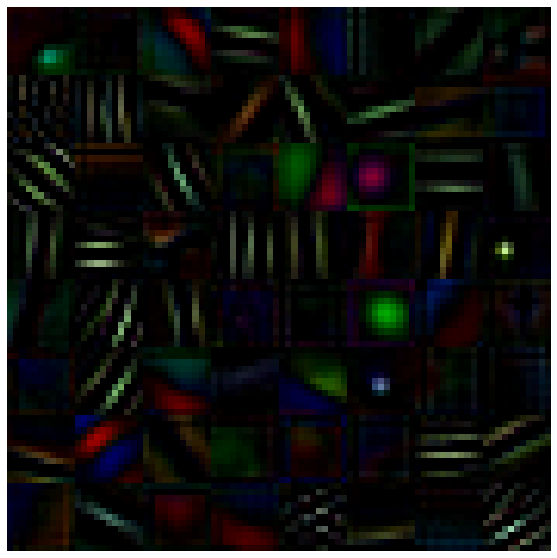

In [ ]:
plot(w1)

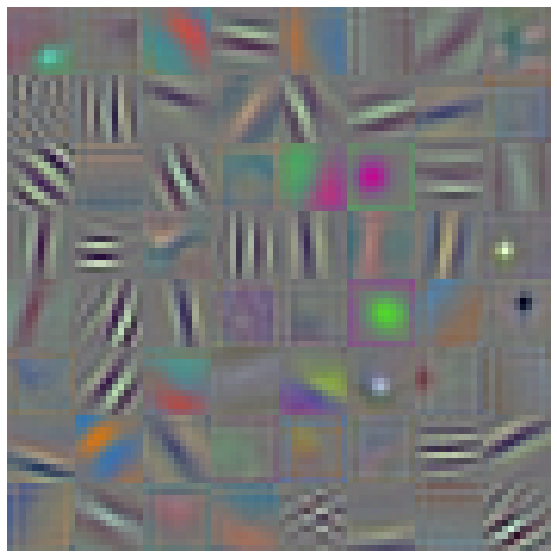

In [ ]:
plot(scale1(montage(np.transpose(net.features[0].weight.data.cpu().numpy(),(0,2,3,1)), multichannel=True)))

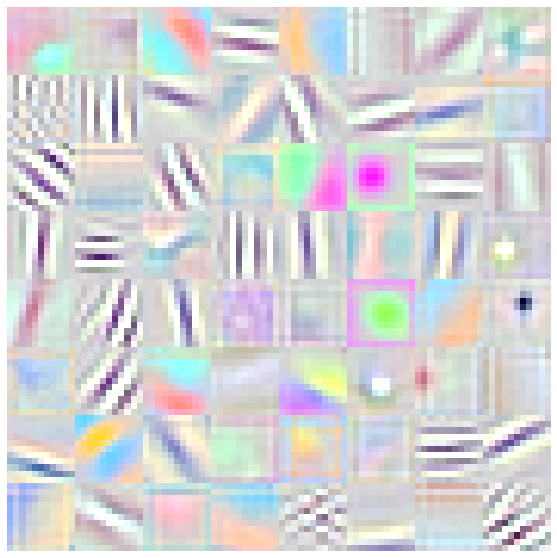

In [ ]:
plot(scale(montage(np.transpose(net.features[0].weight.data.cpu().numpy(),(0,2,3,1)), multichannel=True)))

In [ ]:
img_variable.flatten().shape

torch.Size([150528])

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()

In [ ]:
out.shape

(1, 64, 55, 55)

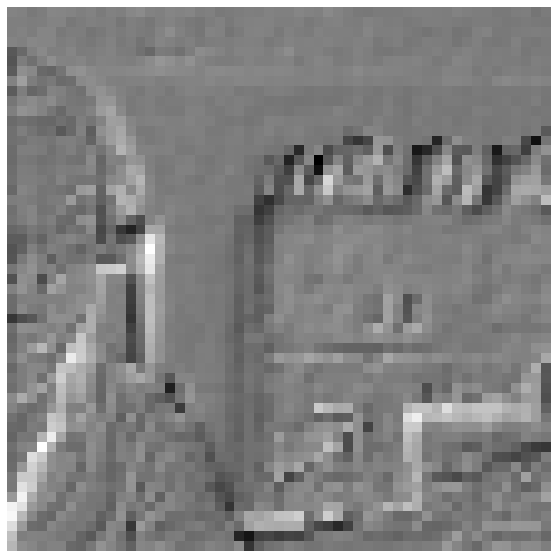

In [ ]:
plot(out[0,0,:,:])

In [ ]:
img_variable.shape

torch.Size([1, 3, 224, 224])

In [ ]:
3*224*224

150528

In [ ]:
64*55*55

193600

In [ ]:
out = np.squeeze(out)

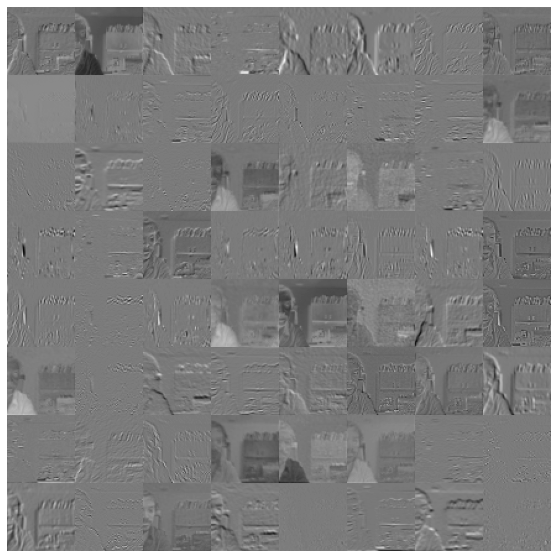

In [ ]:
plot(montage(out))

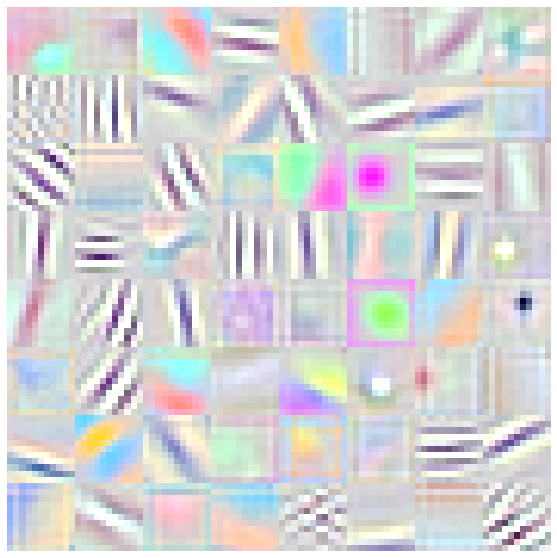

In [ ]:
plot(scale(np.transpose(net.features[0].weight.data.cpu().numpy(),(0,2,3,1))))

In [ ]:
def plot2(x):
    plot(montage(np.squeeze(x.cpu().detach().numpy()))) 

In [ ]:
fmaps = net.features[0:1](img_variable)

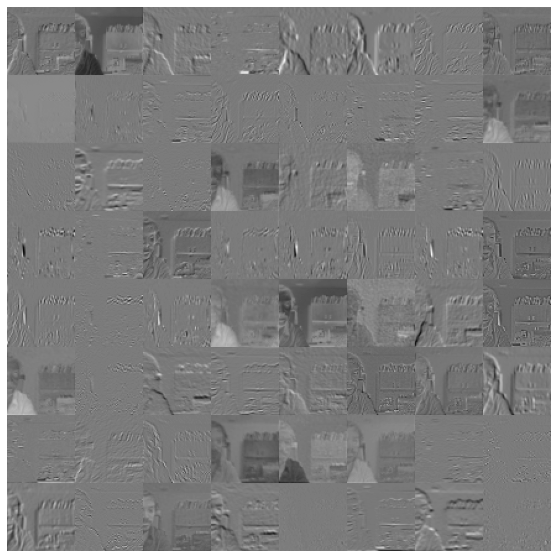

In [ ]:
plot2(fmaps)

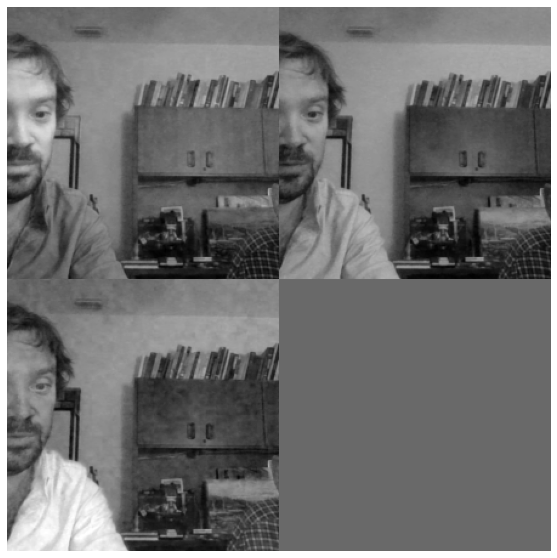

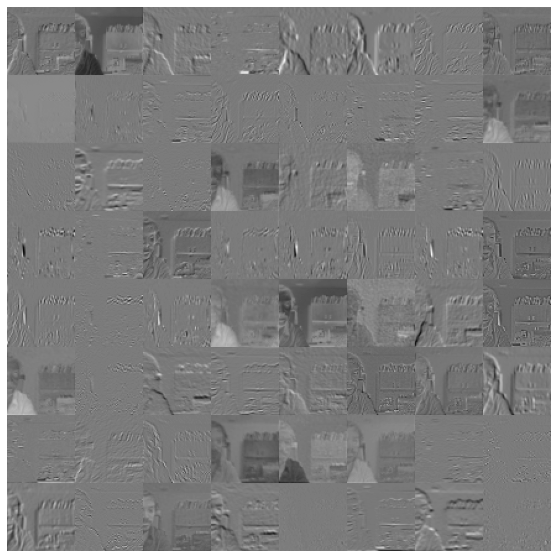

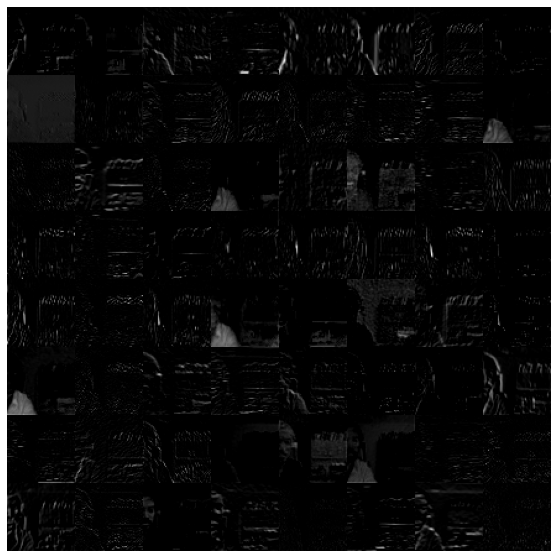

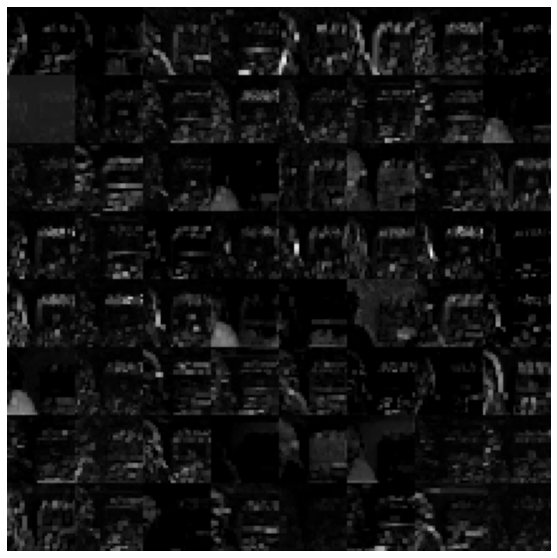

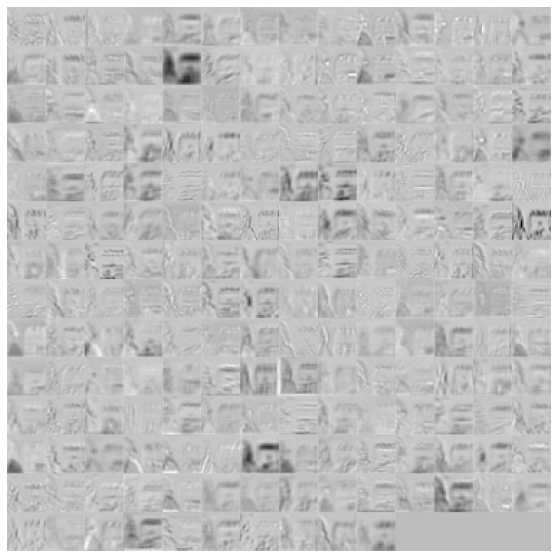

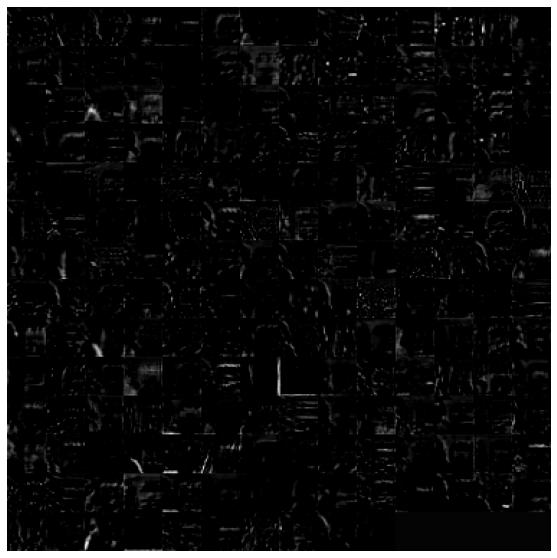

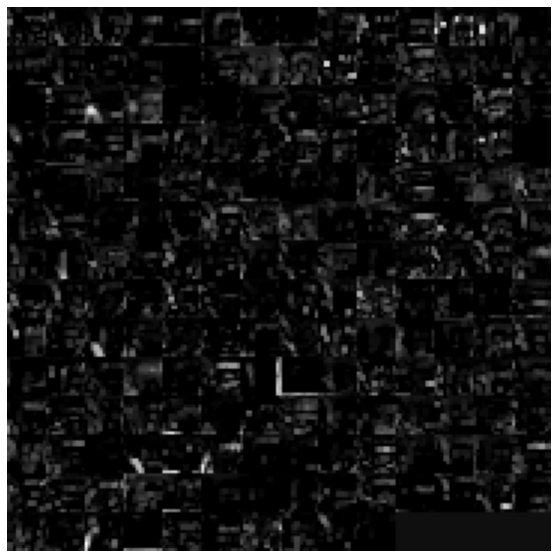

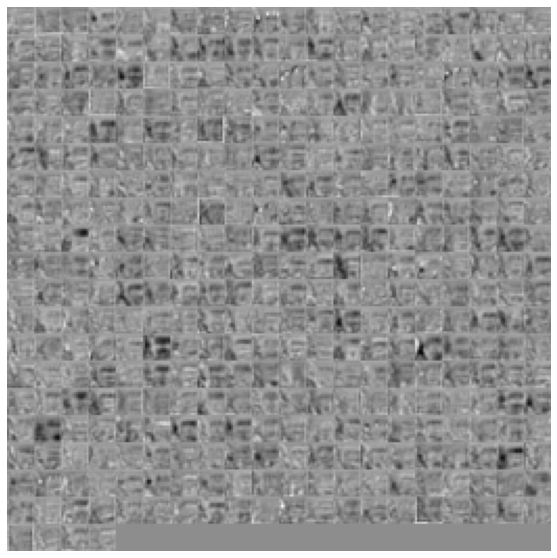

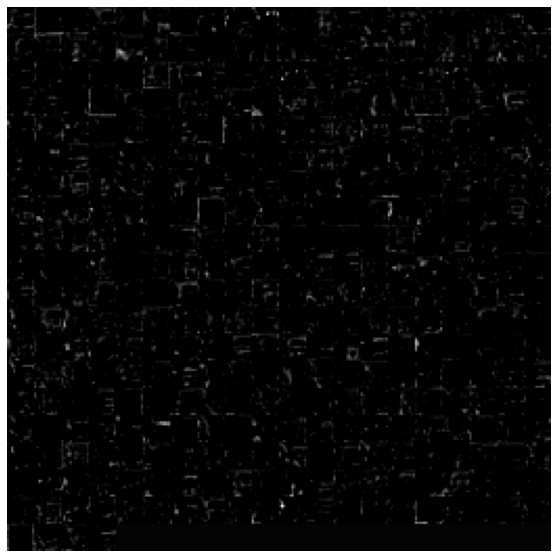

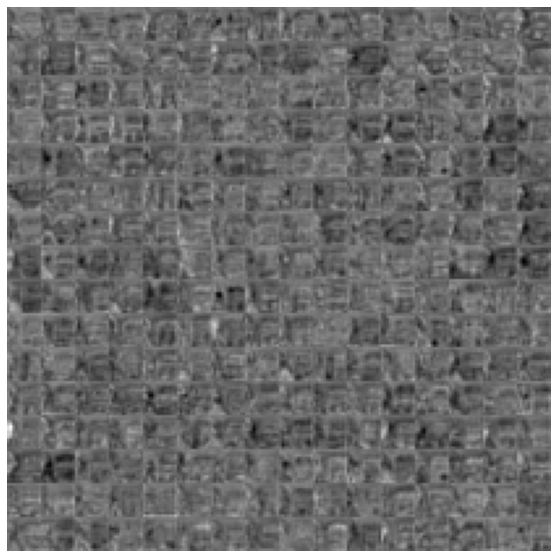

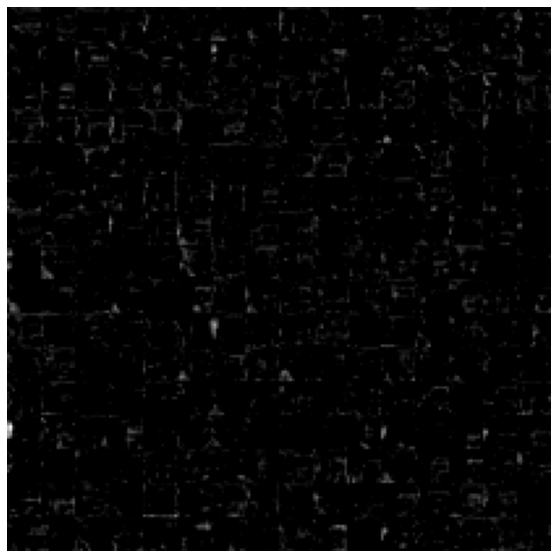

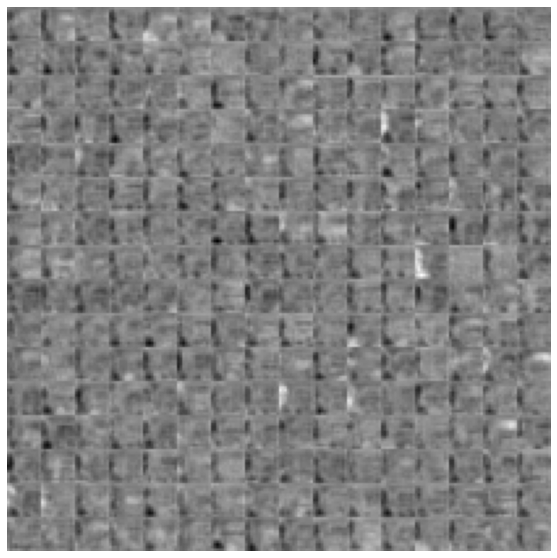

In [ ]:
for i in range(12):
    fmaps = net.features[0:i](img_variable)
    plot2(fmaps)

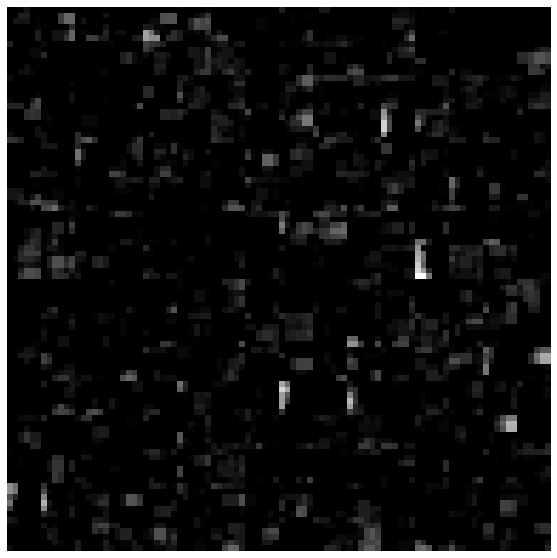

In [ ]:
plot2(net.avgpool(net.features[0:13](img_variable)))  

In [ ]:
net.features[0:13](img_variable).cpu().detach().numpy().shape

(1, 256, 6, 6)

In [ ]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
net.avgpool(net.features[0:13](img_variable)).shape

torch.Size([1, 256, 6, 6])

In [ ]:
net.avgpool(net.features[0:13](img_variable)).flatten().shape[0]

9216

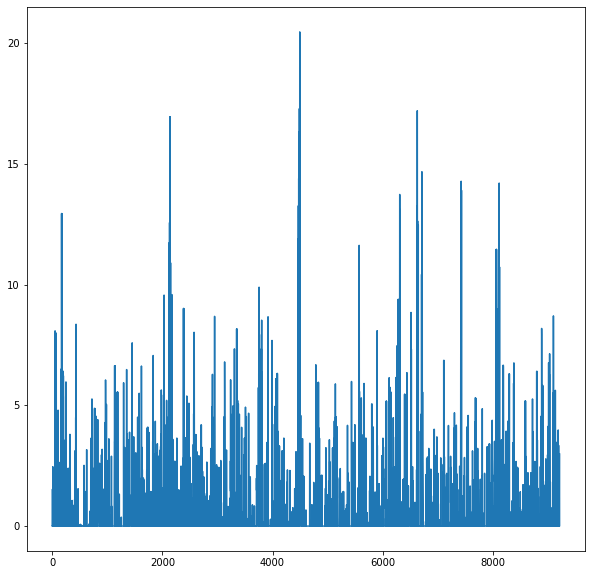

In [ ]:
plt.plot(np.arange(9216),net.avgpool(net.features[0:13](img_variable)).flatten().cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
9216 / (3*224*224) # percentage of numbers left, vs original pixels

0.061224489795918366

In [ ]:
net.classifier[0](net.avgpool(net.features[0:13](img_variable)).flatten()).shape

torch.Size([9216])

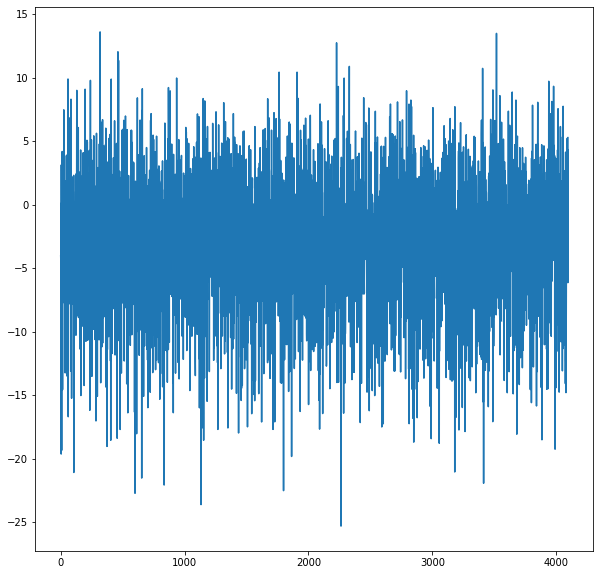

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:2](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

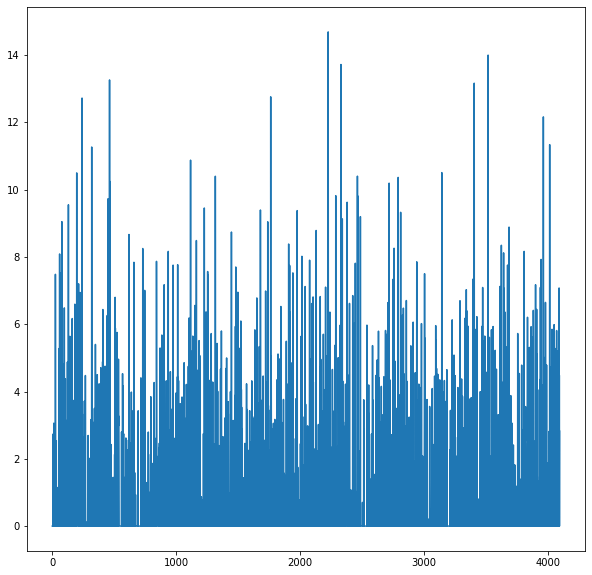

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:3](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

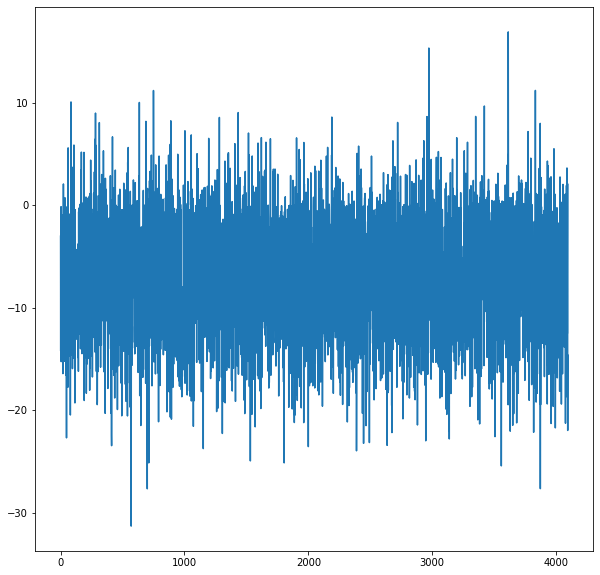

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:5](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
im.shape

(1920, 2560, 3)

In [ ]:
1920*2560*3

14745600

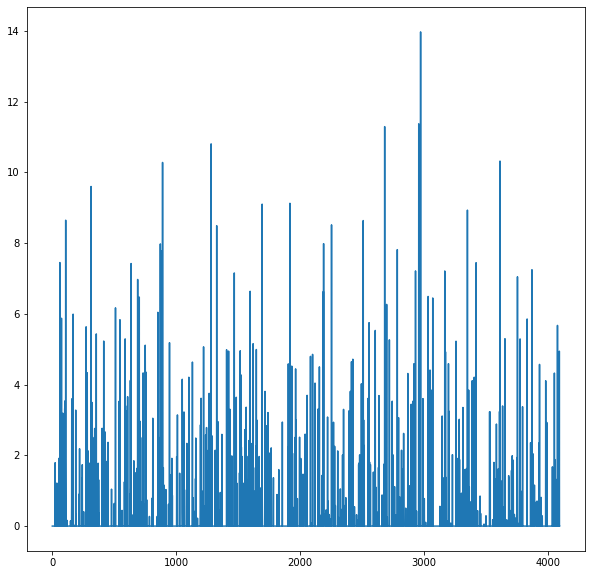

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
4000/14000000

0.00028571428571428574

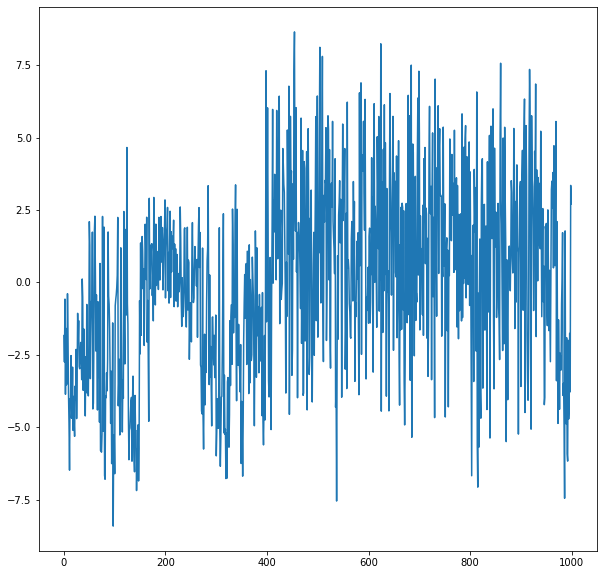

In [ ]:
plt.plot(np.arange(1000),net.classifier[0:7](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
out = net.classifier[0:7](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy()

In [ ]:
def softmax(x):

    s = np.exp(x)

    s = s / np.sum(s)

    return s

In [ ]:
out = softmax(out)

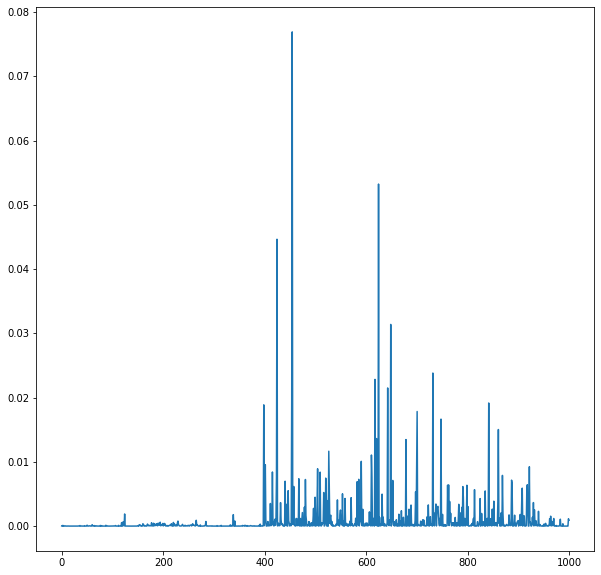

In [ ]:
plt.plot(np.arange(1000),out)
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
label_index = out.argmax()

In [ ]:
label_index

454

In [ ]:
top_list = np.flip(np.argsort(out))[0:10]

In [ ]:
top_list

array([454, 624, 424, 648, 731, 617, 642, 453, 841, 398])

In [ ]:
for i in range(10):
    print(labels[top_list[i]])

bookshop, bookstore, bookstall
library
barbershop
medicine chest, medicine cabinet
plunger, plumber's helper
lab coat, laboratory coat
marimba, xylophone
bookcase
sweatshirt
abacus


In [ ]:
def photo():
    return jsob_to_image(video_frame()["img"])

<IPython.core.display.Javascript object>

(480, 640, 3)


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


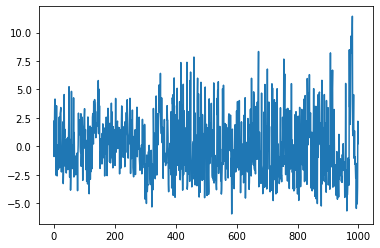

marimba, xylophone
accordion, piano accordion, squeeze box
stage
barbershop
dumbbell
oxygen mask
book jacket, dust cover, dust jacket, dust wrapper
jigsaw puzzle
gasmask, respirator, gas helmet
Scotch terrier, Scottish terrier, Scottie


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


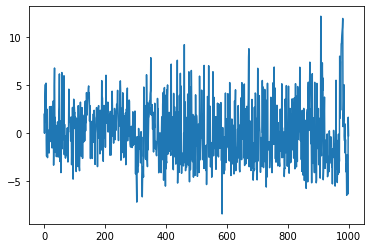

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


vending machine
hair spray
toy poodle
wig
barbershop
neck brace
bookshop, bookstore, bookstall
comic book
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
bookcase
(480, 640, 3)


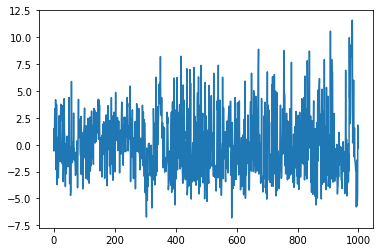

shower cap
spatula
neck brace
marimba, xylophone
television, television system
electric guitar
bookshop, bookstore, bookstall
library
wig
gasmask, respirator, gas helmet


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


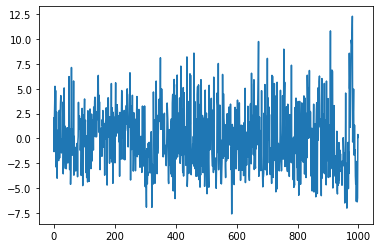

laptop, laptop computer
vending machine
wig
barbershop
neck brace
web site, website, internet site, site
bookshop, bookstore, bookstall
hair spray
comic book
computer keyboard, keypad


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


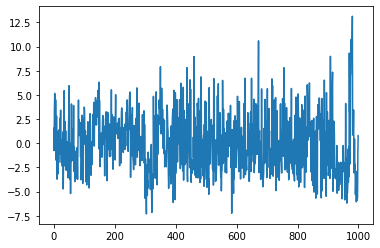

marimba, xylophone
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
toy poodle
neck brace
lab coat, laboratory coat
standard poodle
vending machine
miniature poodle
barbershop
chow, chow chow


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


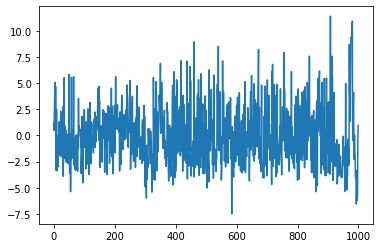

neck brace
marimba, xylophone
accordion, piano accordion, squeeze box
ice lolly, lolly, lollipop, popsicle
barbershop
stage
bookshop, bookstore, bookstall
jersey, T-shirt, tee shirt
panpipe, pandean pipe, syrinx
harmonica, mouth organ, harp, mouth harp


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


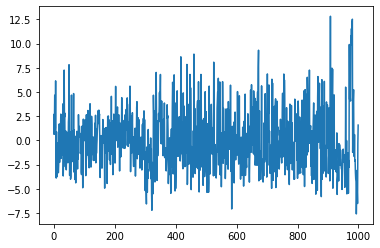

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


ice lolly, lolly, lollipop, popsicle
barbershop
bookshop, bookstore, bookstall
neck brace
wig
spatula
coffee mug
jersey, T-shirt, tee shirt
bow tie, bow-tie, bowtie
marimba, xylophone
(480, 640, 3)


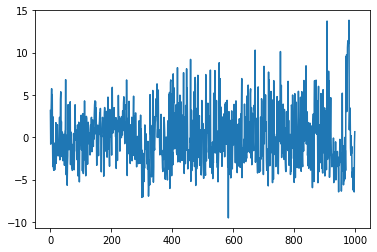

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


panpipe, pandean pipe, syrinx
accordion, piano accordion, squeeze box
harmonica, mouth organ, harp, mouth harp
marimba, xylophone
neck brace
screwdriver
ice lolly, lolly, lollipop, popsicle
flute, transverse flute
mousetrap
spatula
(480, 640, 3)


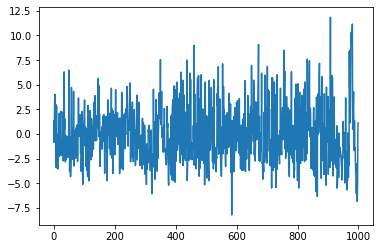

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


power drill
neck brace
hair spray
barbershop
screwdriver
sunscreen, sunblock, sun blocker
accordion, piano accordion, squeeze box
panpipe, pandean pipe, syrinx
spatula
dumbbell
(480, 640, 3)


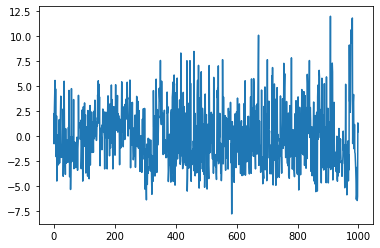

Old English sheepdog, bobtail
marimba, xylophone
barbershop
hair spray
rain barrel
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
milk can
Sealyham terrier, Sealyham
rocking chair, rocker
Australian terrier


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


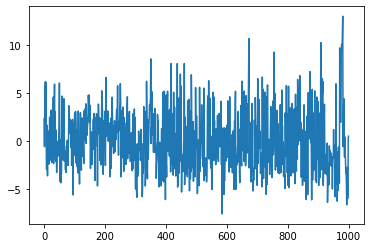

medicine chest, medicine cabinet
lotion
barber chair
library
paper towel
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
printer
bookshop, bookstore, bookstall
laptop, laptop computer
lab coat, laboratory coat


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


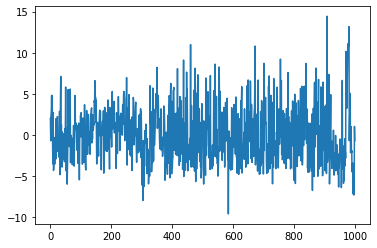

library
cinema, movie theater, movie theatre, movie house, picture palace
bookshop, bookstore, bookstall
bookcase
television, television system
barbershop
dumbbell
medicine chest, medicine cabinet
marimba, xylophone
comic book


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


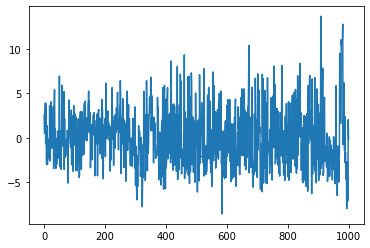

barbershop
sunscreen, sunblock, sun blocker
butcher shop, meat market
swimming trunks, bathing trunks
marimba, xylophone
library
bathing cap, swimming cap
dumbbell
pop bottle, soda bottle
paper towel


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


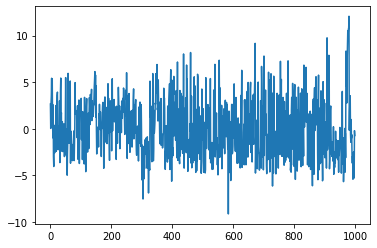

dumbbell
barbell
barbershop
punching bag, punch bag, punching ball, punchball
swimming trunks, bathing trunks
ping-pong ball
medicine chest, medicine cabinet
pool table, billiard table, snooker table
balance beam, beam
desktop computer


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


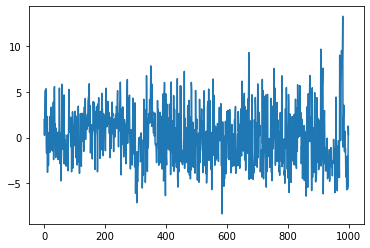

medicine chest, medicine cabinet
stage
marimba, xylophone
bookshop, bookstore, bookstall
lotion
hair spray
television, television system
barbell
jersey, T-shirt, tee shirt
dumbbell


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


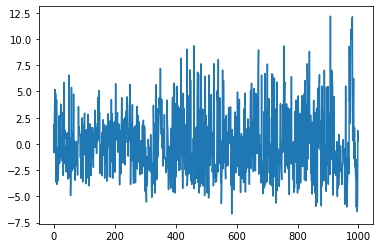

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


briard
Norfolk terrier
cairn, cairn terrier
soft-coated wheaten terrier
Airedale, Airedale terrier
Irish terrier
Norwich terrier
barbershop
Australian terrier
collie
(480, 640, 3)


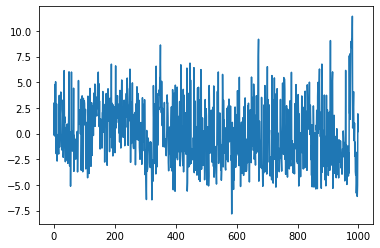

bookcase
dumbbell
cinema, movie theater, movie theatre, movie house, picture palace
medicine chest, medicine cabinet
bookshop, bookstore, bookstall
lotion
desktop computer
desk
balance beam, beam
hair spray


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


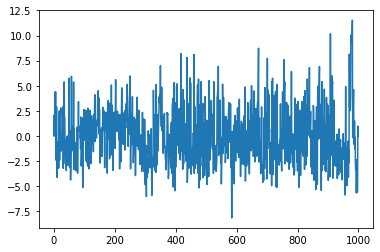

medicine chest, medicine cabinet
balance beam, beam
hair spray
pop bottle, soda bottle
barbershop
bathing cap, swimming cap
beer bottle
lotion
sunscreen, sunblock, sun blocker
syringe


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


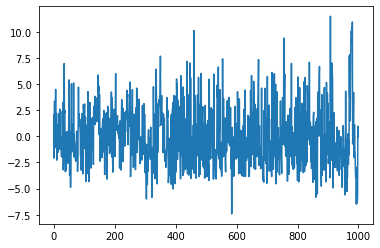

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


barbershop
medicine chest, medicine cabinet
hair spray
lotion
neck brace
stage
shower curtain
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
plunger, plumber's helper
dumbbell
(480, 640, 3)


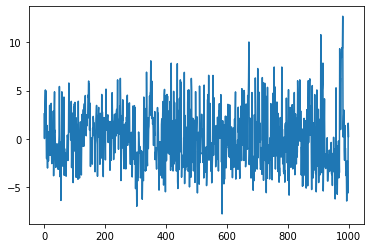

marimba, xylophone
medicine chest, medicine cabinet
accordion, piano accordion, squeeze box
television, television system
jersey, T-shirt, tee shirt
desktop computer
sewing machine
barbershop
bookcase
prayer rug, prayer mat


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


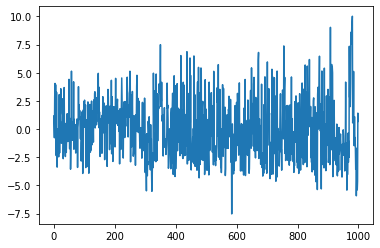

medicine chest, medicine cabinet
bookcase
gondola
library
bookshop, bookstore, bookstall
desktop computer
desk
altar
cinema, movie theater, movie theatre, movie house, picture palace
barbershop


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


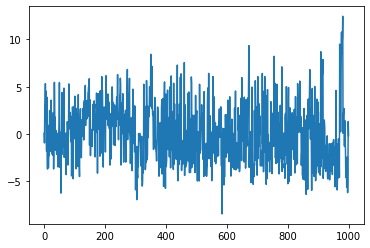

butcher shop, meat market
home theater, home theatre
medicine chest, medicine cabinet
bookshop, bookstore, bookstall
stage
pool table, billiard table, snooker table
grocery store, grocery, food market, market
altar
vacuum, vacuum cleaner
bookcase


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


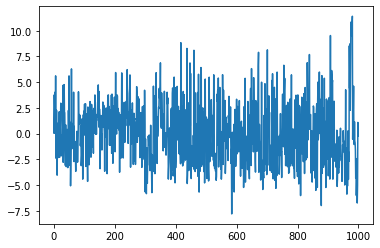

library
soft-coated wheaten terrier
bookshop, bookstore, bookstall
toy poodle
gondola
Australian terrier
shopping basket
medicine chest, medicine cabinet
barbershop
pole


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


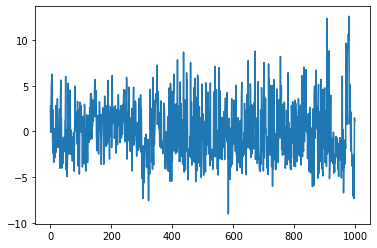

hair spray
television, television system
medicine chest, medicine cabinet
pop bottle, soda bottle
desktop computer
paper towel
rubber eraser, rubber, pencil eraser
dumbbell
library
barbershop


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


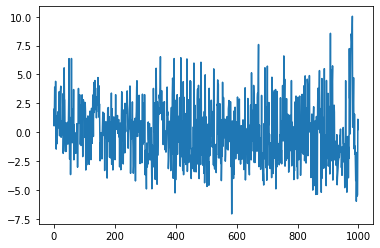

medicine chest, medicine cabinet
hair spray
lotion
Old English sheepdog, bobtail
marimba, xylophone
pop bottle, soda bottle
bookcase
bookshop, bookstore, bookstall
library
punching bag, punch bag, punching ball, punchball


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


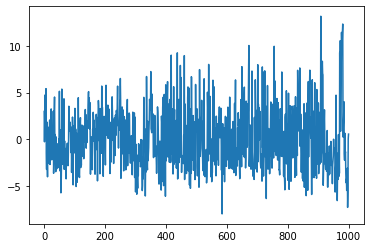

barbershop
marimba, xylophone
accordion, piano accordion, squeeze box
laptop, laptop computer
lab coat, laboratory coat
water bottle
television, television system
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
desktop computer
cellular telephone, cellular phone, cellphone, cell, mobile phone


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


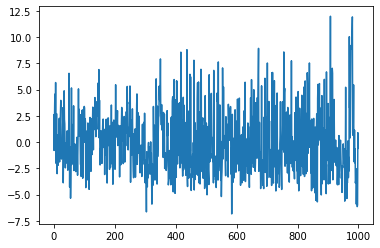

desktop computer
marimba, xylophone
television, television system
oscilloscope, scope, cathode-ray oscilloscope, CRO
accordion, piano accordion, squeeze box
desk
laptop, laptop computer
dumbbell
barbershop
tape player


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


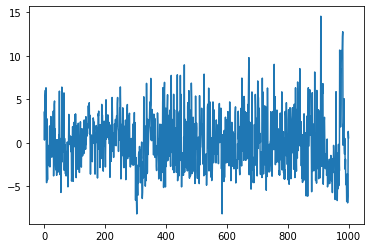

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


bookshop, bookstore, bookstall
bookcase
comic book
television, television system
marimba, xylophone
laptop, laptop computer
toy poodle
library
dumbbell
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
(480, 640, 3)


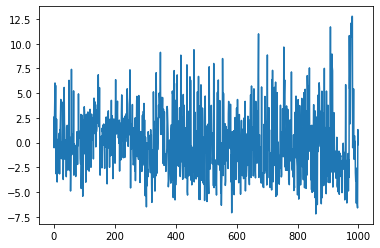

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


medicine chest, medicine cabinet
library
barbershop
desk
desktop computer
bookshop, bookstore, bookstall
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
bookcase
neck brace
hair spray
(480, 640, 3)


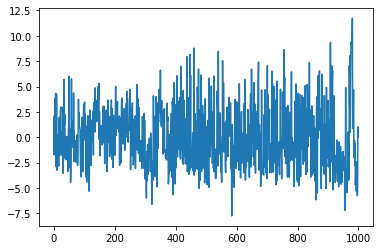

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


laptop, laptop computer
dumbbell
accordion, piano accordion, squeeze box
spatula
ping-pong ball
marimba, xylophone
barbershop
vending machine
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
swimming trunks, bathing trunks
(480, 640, 3)


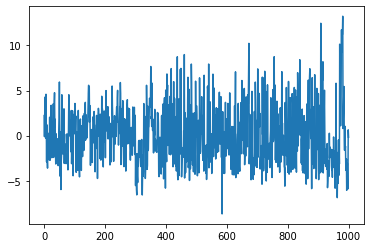

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


spatula
marimba, xylophone
barbershop
dumbbell
tray
coffee mug
medicine chest, medicine cabinet
bookshop, bookstore, bookstall
abacus
power drill
(480, 640, 3)


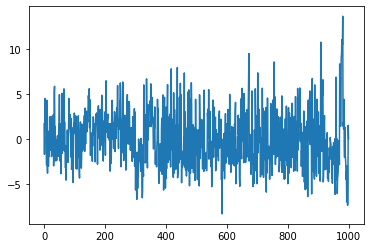

dumbbell
marimba, xylophone
harmonica, mouth organ, harp, mouth harp
barbershop
spatula
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
accordion, piano accordion, squeeze box
desktop computer
screwdriver
power drill


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


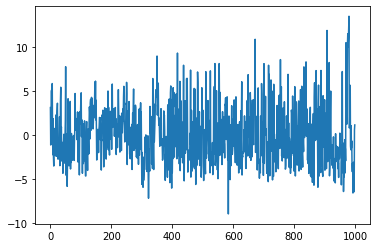

laptop, laptop computer
barbershop
marimba, xylophone
ice lolly, lolly, lollipop, popsicle
comic book
bathing cap, swimming cap
desktop computer
web site, website, internet site, site
sunscreen, sunblock, sun blocker
jigsaw puzzle


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


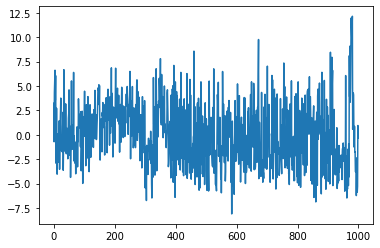

marimba, xylophone
wig
accordion, piano accordion, squeeze box
coffee mug
bathing cap, swimming cap
laptop, laptop computer
harmonica, mouth organ, harp, mouth harp
shower curtain
ice lolly, lolly, lollipop, popsicle
hair spray


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


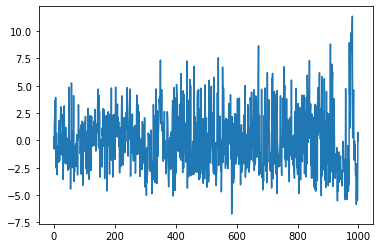

barbershop
marimba, xylophone
accordion, piano accordion, squeeze box
neck brace
bookshop, bookstore, bookstall
hair spray
swimming trunks, bathing trunks
laptop, laptop computer
spatula
bathing cap, swimming cap


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


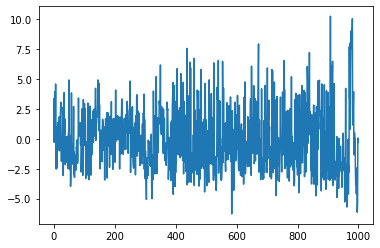

coffee mug
accordion, piano accordion, squeeze box
bookcase
cinema, movie theater, movie theatre, movie house, picture palace
vending machine
shower cap
water bottle
hair spray
screwdriver
marimba, xylophone


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


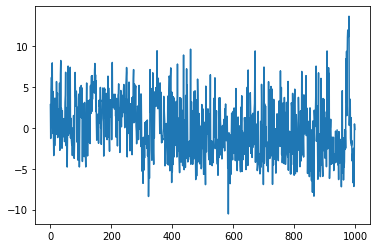

bookcase
hair spray
library
dumbbell
marimba, xylophone
mouse, computer mouse
comic book
tape player
laptop, laptop computer
toaster


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


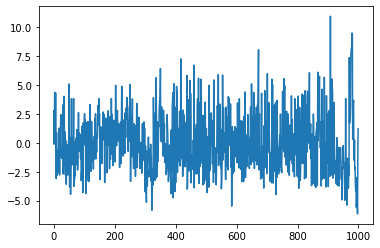

desktop computer
hand-held computer, hand-held microcomputer
notebook, notebook computer
mouse, computer mouse
laptop, laptop computer
television, television system
accordion, piano accordion, squeeze box
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
home theater, home theatre
monitor


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


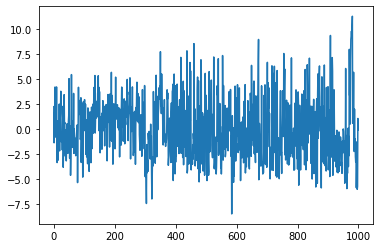

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


shower curtain
ice lolly, lolly, lollipop, popsicle
vending machine
panpipe, pandean pipe, syrinx
neck brace
oscilloscope, scope, cathode-ray oscilloscope, CRO
shower cap
bookshop, bookstore, bookstall
comic book
web site, website, internet site, site
(480, 640, 3)


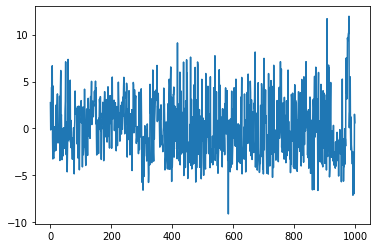

fountain
geyser
monitor
stage
planetarium
projector
candle, taper, wax light
screen, CRT screen
spotlight, spot
television, television system


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


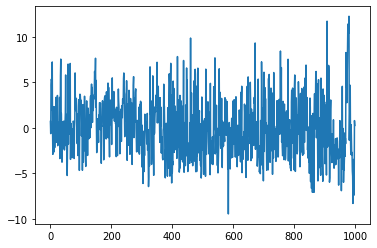

lighter, light, igniter, ignitor
snorkel
whistle
oxygen mask
microphone, mike
stage
matchstick
nipple
bubble
water bottle


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


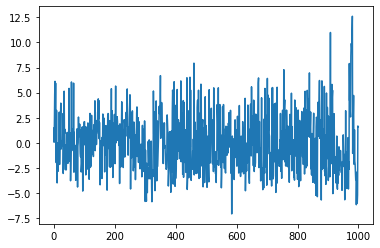

stage
whistle
lighter, light, igniter, ignitor
bow tie, bow-tie, bowtie
neck brace
gasmask, respirator, gas helmet
torch
candle, taper, wax light
pinwheel
oxygen mask


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


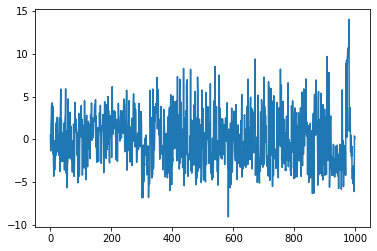

neck brace
whistle
piggy bank, penny bank
nipple
snorkel
dugong, Dugong dugon
lighter, light, igniter, ignitor
candle, taper, wax light
gasmask, respirator, gas helmet
bathing cap, swimming cap


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


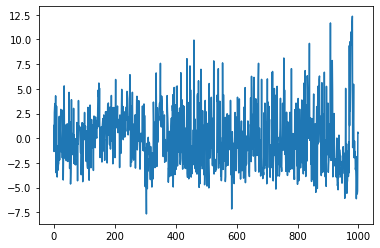

lighter, light, igniter, ignitor
neck brace
car mirror
pool table, billiard table, snooker table
seat belt, seatbelt
whistle
candle, taper, wax light
gasmask, respirator, gas helmet
projector
bow tie, bow-tie, bowtie


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


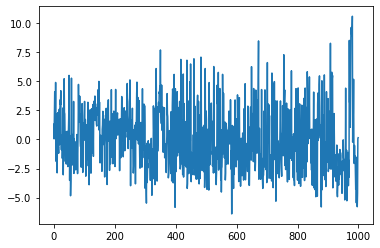

lighter, light, igniter, ignitor
snorkel
maraca
stage
neck brace
whistle
nipple
candle, taper, wax light
piggy bank, penny bank
torch


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


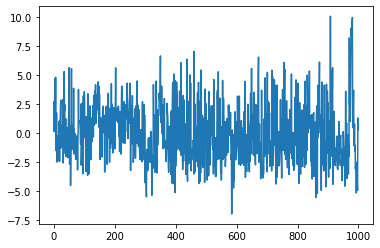

scuba diver
lighter, light, igniter, ignitor
candle, taper, wax light
oxygen mask
gasmask, respirator, gas helmet
stage
nipple
neck brace
seat belt, seatbelt
binoculars, field glasses, opera glasses


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


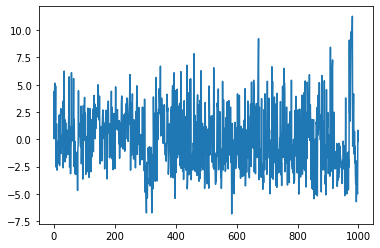

toy poodle
cellular telephone, cellular phone, cellphone, cell, mobile phone
ice lolly, lolly, lollipop, popsicle
neck brace
oscilloscope, scope, cathode-ray oscilloscope, CRO
power drill
bathing cap, swimming cap
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
pay-phone, pay-station
koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


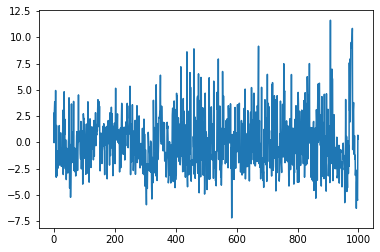

wig
hair spray
shower cap
web site, website, internet site, site
ice lolly, lolly, lollipop, popsicle
barbershop
cassette
shower curtain
vending machine
bookshop, bookstore, bookstall


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


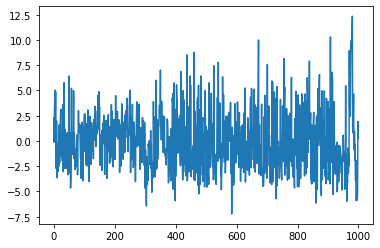

hair spray
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
shower curtain
balance beam, beam
shower cap
dumbbell
toaster
wig
neck brace
medicine chest, medicine cabinet


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


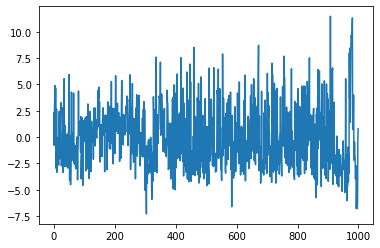

ice lolly, lolly, lollipop, popsicle
vending machine
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
screen, CRT screen

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)



dumbbell
shower curtain
bookshop, bookstore, bookstall
comic book
pencil box, pencil case
lighter, light, igniter, ignitor
(480, 640, 3)


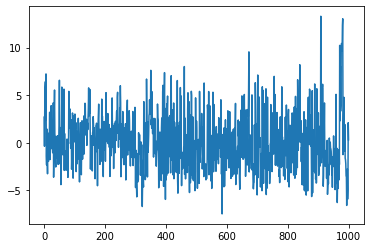

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
bookshop, bookstore, bookstall
medicine chest, medicine cabinet
vending machine
neck brace
library
comic book
dumbbell
tobacco shop, tobacconist shop, tobacconist
barbershop
(480, 640, 3)


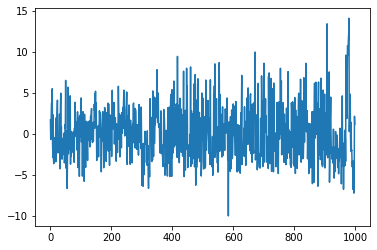

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


slot, one-armed bandit
jersey, T-shirt, tee shirt
toyshop
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
spatula
butcher shop, meat market
marimba, xylophone
vending machine
sarong
rain barrel
(480, 640, 3)


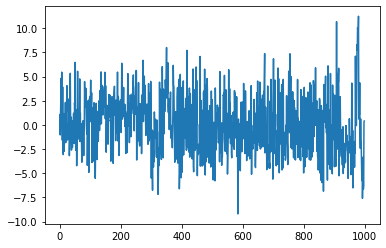

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


cellular telephone, cellular phone, cellphone, cell, mobile phone
marimba, xylophone
screwdriver
power drill
water bottle
accordion, piano accordion, squeeze box
sewing machine
neck brace
hair spray
remote control, remote
(480, 640, 3)


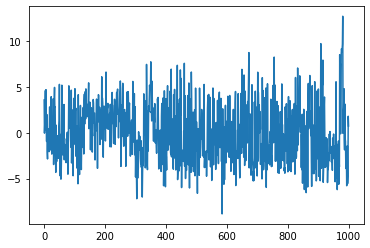

laptop, laptop computer
barbershop
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
web site, website, internet site, site
marimba, xylophone
television, television system
desktop computer
stage
ping-pong ball
swimming trunks, bathing trunks


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


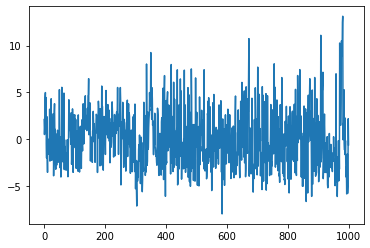

jersey, T-shirt, tee shirt
jigsaw puzzle
accordion, piano accordion, squeeze box
vending machine
library
medicine chest, medicine cabinet
switch, electric switch, electrical switch
laptop, laptop computer
abacus
pay-phone, pay-station


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


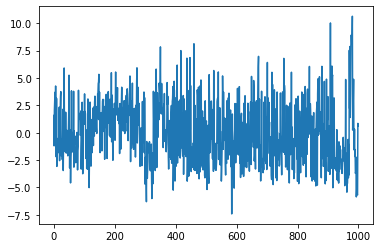

marimba, xylophone
barbershop
bookshop, bookstore, bookstall
hair spray
butcher shop, meat market
laptop, laptop computer
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
cellular telephone, cellular phone, cellphone, cell, mobile phone
library
grocery store, grocery, food market, market


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


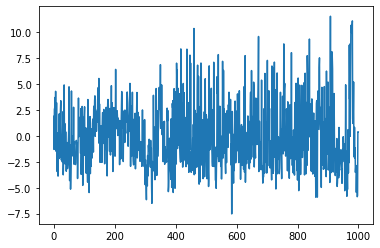

beer glass
packet
plastic bag
sunscreen, sunblock, sun blocker
perfume, essence
measuring cup
pitcher, ewer
water jug
pill bottle
beer bottle


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


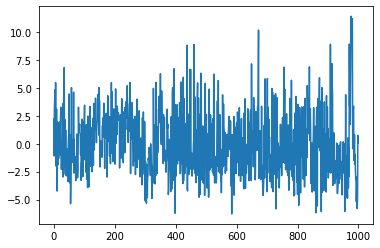

jersey, T-shirt, tee shirt
pill bottle
plastic bag
packet
baseball
Band Aid
coffee mug
perfume, essence
water bottle
book jacket, dust cover, dust jacket, dust wrapper


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


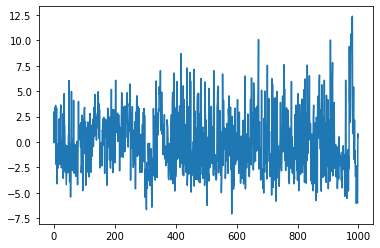

water bottle
beer glass
jersey, T-shirt, tee shirt
carton
water jug
book jacket, dust cover, dust jacket, dust wrapper
vending machine
street sign
bookshop, bookstore, bookstall
oil filter


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


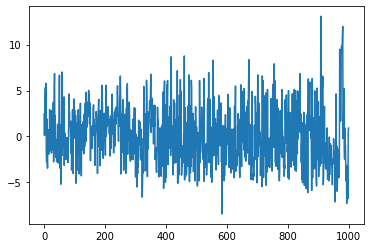

water bottle
moving van
crate
mailbox, letter box
garbage truck, dustcart
ambulance
police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria
street sign
ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
bookshop, bookstore, bookstall


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


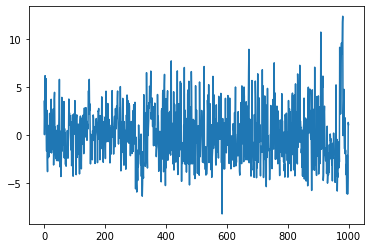

marimba, xylophone
barbershop
water bottle
catamaran
street sign
container ship, containership, container vessel
cinema, movie theater, movie theatre, movie house, picture palace
moving van
freight car
passenger car, coach, carriage


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


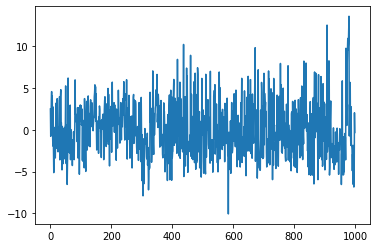

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


water bottle
water jug
liner, ocean liner
passenger car, coach, carriage
mobile home, manufactured home
dock, dockage, docking facility
container ship, containership, container vessel
maze, labyrinth
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
coil, spiral, volute, whorl, helix
(480, 640, 3)


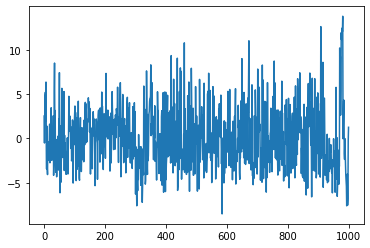

passenger car, coach, carriage
moving van
electric locomotive
recreational vehicle, RV, R.V.
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
mobile home, manufactured home
crate
garbage truck, dustcart
catamaran
bullet train, bullet


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


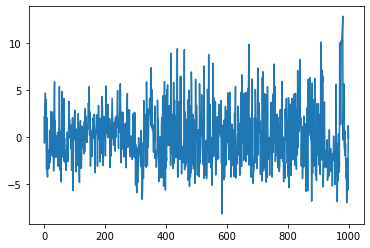

water bottle
plastic bag
water jug
jersey, T-shirt, tee shirt
vending machine
beer glass
pop bottle, soda bottle
shopping basket
saltshaker, salt shaker
ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


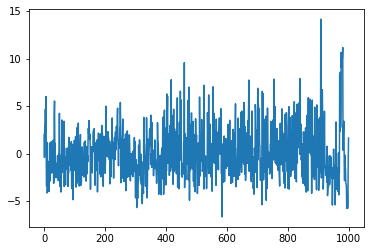

water bottle
jersey, T-shirt, tee shirt
shopping basket
moving van
oil filter
broom
bakery, bakeshop, bakehouse
water jug
vending machine
hamper


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


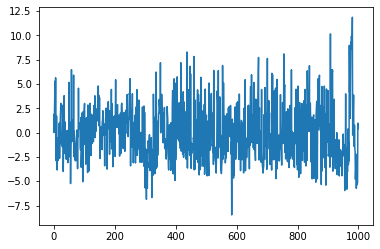

water bottle
pop bottle, soda bottle
jersey, T-shirt, tee shirt
lotion
perfume, essence
barbershop
water jug
hair spray
balloon
refrigerator, icebox


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


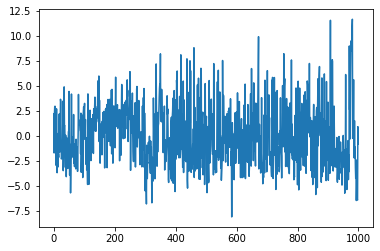

water bottle
shopping basket
broom
marimba, xylophone
jersey, T-shirt, tee shirt
water jug
apron
vending machine
barbershop
barrel, cask


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


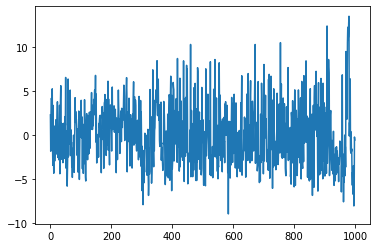

shopping basket
water bottle
jersey, T-shirt, tee shirt
pedestal, plinth, footstall
cinema, movie theater, movie theatre, movie house, picture palace
marimba, xylophone
maze, labyrinth
refrigerator, icebox
water jug
crate


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


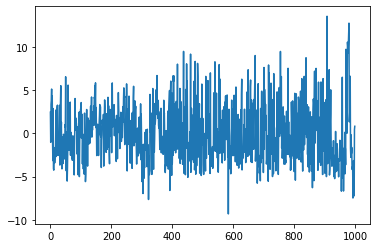

water bottle
oil filter
hair spray
lotion
perfume, essence
water jug
vending machine
rubber eraser, rubber, pencil eraser
lipstick, lip rouge
paper towel


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


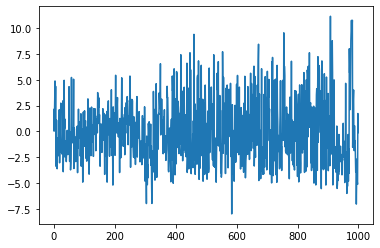

water bottle
passenger car, coach, carriage
pop bottle, soda bottle
catamaran
oil filter
moving van
electric locomotive
trimaran
water jug
vending machine


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


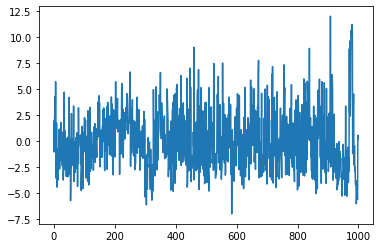

water bottle
pop bottle, soda bottle
beer bottle
water jug
hair spray
coffee mug
beer glass
oil filter
lotion
street sign


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


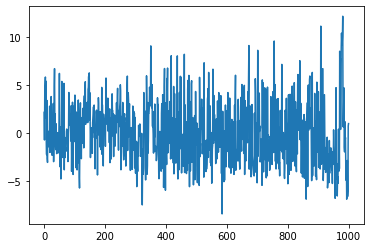

water bottle
Band Aid
measuring cup
shopping basket
oil filter
vending machine
water jug
bucket, pail
paper towel
plastic bag


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


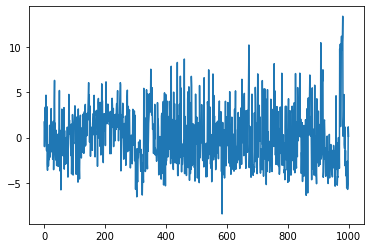

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


water bottle
water jug
pop bottle, soda bottle
beer glass
jersey, T-shirt, tee shirt
measuring cup
beer bottle
bucket, pail
punching bag, punch bag, punching ball, punchball
perfume, essence
(480, 640, 3)


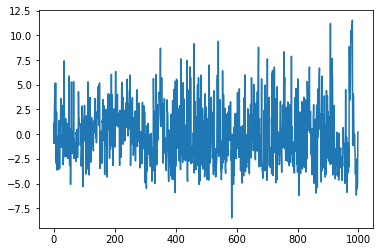

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


water bottle
water jug
shopping basket
jersey, T-shirt, tee shirt
pop bottle, soda bottle
oil filter
apron
plastic bag
toilet tissue, toilet paper, bathroom tissue
paper towel
(480, 640, 3)


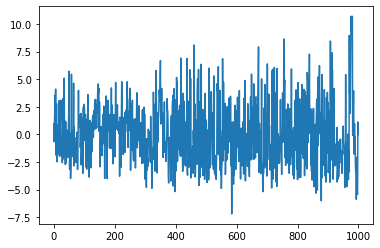

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


water bottle
lotion
pop bottle, soda bottle
cocktail shaker
oil filter
water jug
pill bottle
plastic bag
hair spray
beer glass
(480, 640, 3)


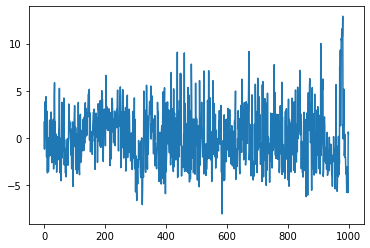

water bottle
water jug
broom
vending machine
jersey, T-shirt, tee shirt
paper towel
toilet tissue, toilet paper, bathroom tissue
nipple
rain barrel
can opener, tin opener


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


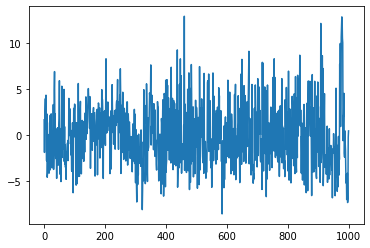

water bottle
jersey, T-shirt, tee shirt
lotion
oil filter
pop bottle, soda bottle
plastic bag
water jug
hair spray
Band Aid
measuring cup


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


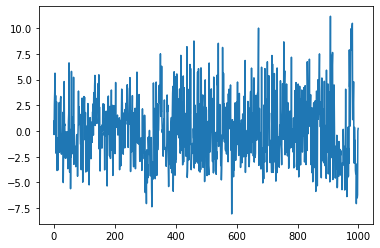

water bottle
jersey, T-shirt, tee shirt
water jug
plastic bag
pajama, pyjama, pj's, jammies
sweatshirt
pop bottle, soda bottle
shopping basket
apron
cocktail shaker


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


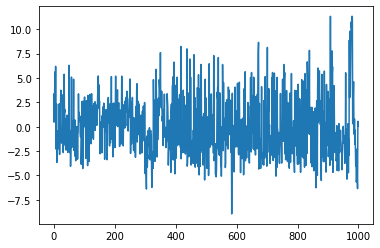

water bottle
pop bottle, soda bottle
water jug
lotion
rain barrel
jersey, T-shirt, tee shirt
pitcher, ewer
vase
oil filter
punching bag, punch bag, punching ball, punchball


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


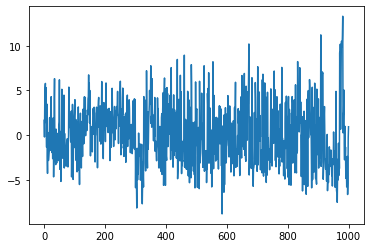

water bottle
ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
cocktail shaker
beer glass
pop bottle, soda bottle
jersey, T-shirt, tee shirt
lotion
packet
measuring cup
water jug


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


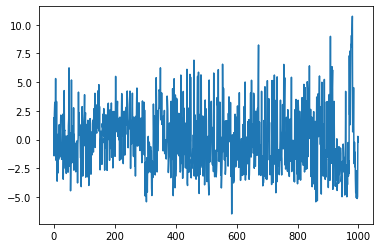

water bottle
water jug
jersey, T-shirt, tee shirt
plastic bag
whiskey jug
lotion
beer bottle
coffee mug
pop bottle, soda bottle
sunscreen, sunblock, sun blocker


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


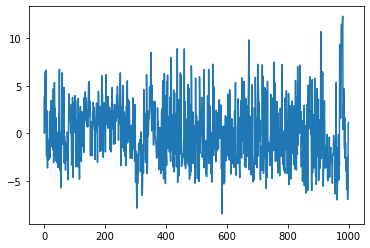

water bottle
oil filter
pill bottle
lotion
Band Aid
water jug
measuring cup
sunscreen, sunblock, sun blocker
cocktail shaker
jersey, T-shirt, tee shirt


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


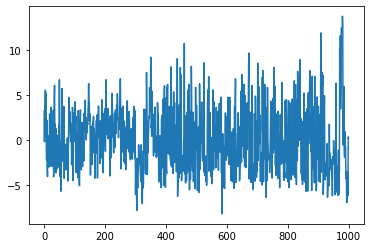

water bottle
oil filter
plastic bag
packet
syringe
bath towel
water jug
nipple
pill bottle
bucket, pail


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


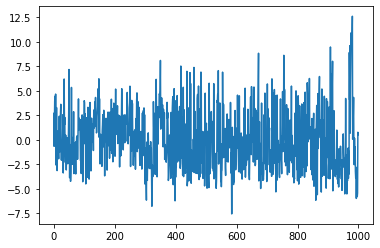

water bottle
punching bag, punch bag, punching ball, punchball
pill bottle
beer glass
saltshaker, salt shaker
water jug
bearskin, busby, shako
rain barrel
pop bottle, soda bottle
packet


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


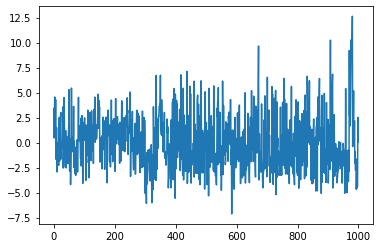

water bottle
Band Aid
oil filter
punching bag, punch bag, punching ball, punchball
nipple
rubber eraser, rubber, pencil eraser
syringe
perfume, essence
beer bottle
lotion


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


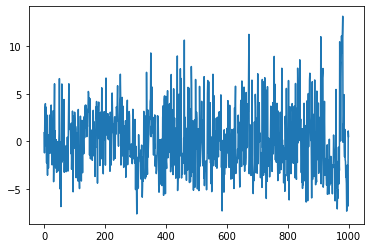

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


water bottle
beer glass
rubber eraser, rubber, pencil eraser
packet
pop bottle, soda bottle
saltshaker, salt shaker
nipple
safety pin
beer bottle
lotion
(480, 640, 3)


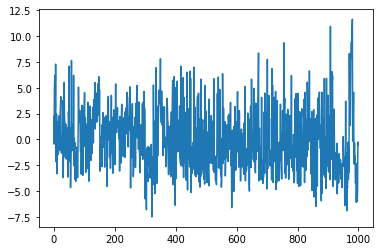

water jug
nipple
water bottle
vacuum, vacuum cleaner
lotion
eggnog
vending machine
Band Aid
sunscreen, sunblock, sun blocker
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


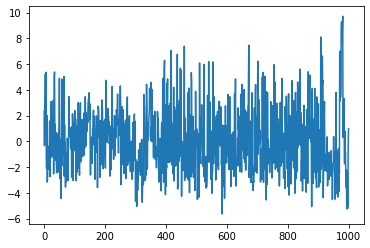

water bottle
Band Aid
punching bag, punch bag, punching ball, punchball
jersey, T-shirt, tee shirt
shopping basket
water jug
vending machine
oil filter
knee pad
lotion


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


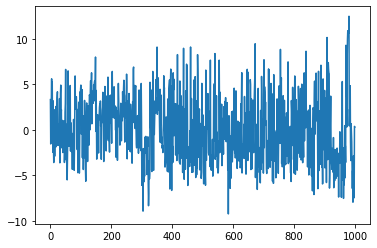

water bottle
pill bottle
isopod
packet
lotion
saltshaker, salt shaker
oil filter
ping-pong ball
hamper
potter's wheel


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


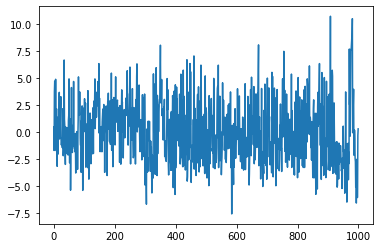

water bottle
safety pin
saltshaker, salt shaker
isopod
punching bag, punch bag, punching ball, punchball
bathing cap, swimming cap
broom
packet
potter's wheel
oil filter


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


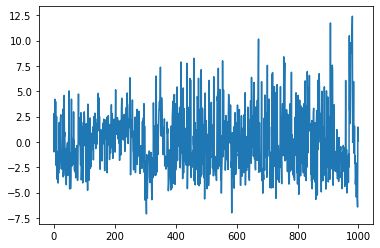

water bottle
nipple
space heater
stopwatch, stop watch
jersey, T-shirt, tee shirt
pill bottle
punching bag, punch bag, punching ball, punchball
safety pin
Band Aid
rubber eraser, rubber, pencil eraser


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


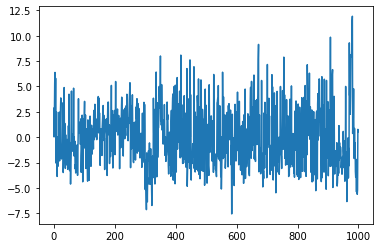

water bottle
Band Aid
jersey, T-shirt, tee shirt
punching bag, punch bag, punching ball, punchball
rain barrel
packet
oil filter
nipple
Petri dish
pop bottle, soda bottle


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


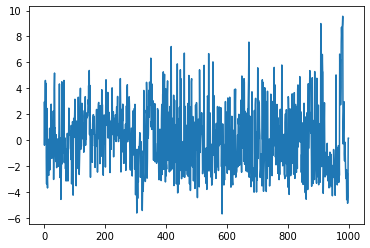

fountain
geyser
beacon, lighthouse, beacon light, pharos
airship, dirigible
spotlight, spot
projector
flagpole, flagstaff
digital clock
bell cote, bell cot
water bottle


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


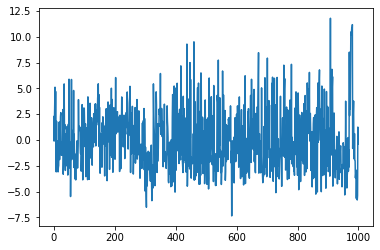

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


desktop computer
monitor
cinema, movie theater, movie theatre, movie house, picture palace
television, television system
screen, CRT screen
bookcase
projector
dumbbell
barbershop
pay-phone, pay-station
(480, 640, 3)


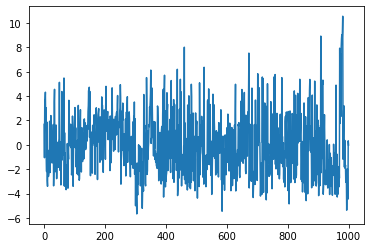

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


desktop computer
cinema, movie theater, movie theatre, movie house, picture palace
desk
monitor
medicine chest, medicine cabinet
library
bookcase
entertainment center
tape player
screen, CRT screen
(480, 640, 3)


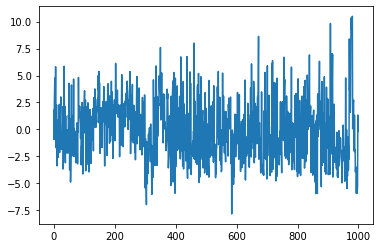

medicine chest, medicine cabinet
sewing machine
lotion
switch, electric switch, electrical switch
water bottle
home theater, home theatre
screwdriver
syringe
barbershop
hair spray


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


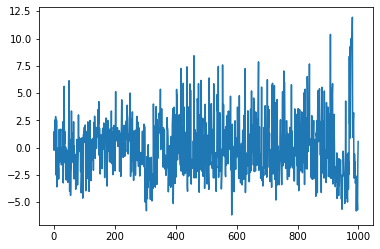

medicine chest, medicine cabinet
garbage truck, dustcart
bookshop, bookstore, bookstall
moving van
library
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
container ship, containership, container vessel
cinema, movie theater, movie theatre, movie house, picture palace
desk
desktop computer


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


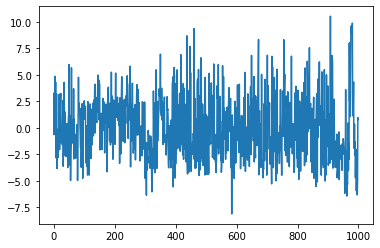

medicine chest, medicine cabinet
desktop computer
library
bookcase
bookshop, bookstore, bookstall
screen, CRT screen
lab coat, laboratory coat
desk
home theater, home theatre
barber chair


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


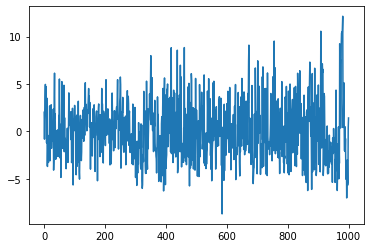

library
medicine chest, medicine cabinet
bookcase
bookshop, bookstore, bookstall
barbershop
desk
cinema, movie theater, movie theatre, movie house, picture palace
pop bottle, soda bottle
vending machine
hair spray


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


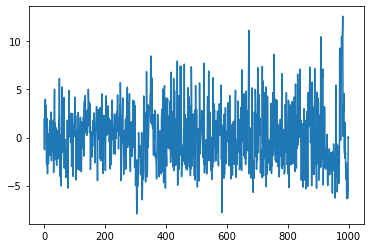

medicine chest, medicine cabinet
library
swab, swob, mop
barbershop
bookcase
bookshop, bookstore, bookstall
gas pump, gasoline pump, petrol pump, island dispenser
desktop computer
cinema, movie theater, movie theatre, movie house, picture palace
monitor


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


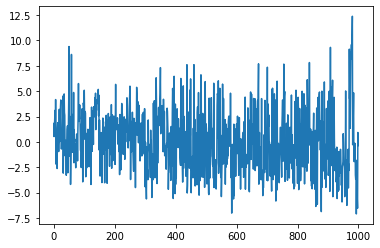

desktop computer
mouse, computer mouse
barbershop
monitor
shower curtain
bookshop, bookstore, bookstall
library
laptop, laptop computer
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
screen, CRT screen


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


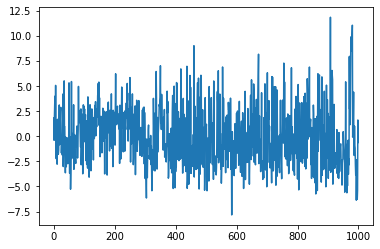

bookshop, bookstore, bookstall
bookcase
library
medicine chest, medicine cabinet
cinema, movie theater, movie theatre, movie house, picture palace
desk
sewing machine
desktop computer
barbershop
comic book


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


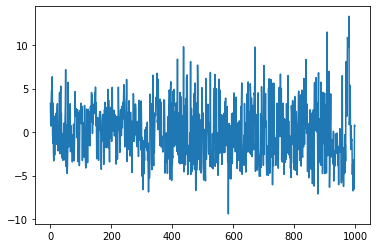

medicine chest, medicine cabinet
library
bookshop, bookstore, bookstall
desktop computer
monitor
carton
bookcase
desk
pop bottle, soda bottle
carpenter's kit, tool kit


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


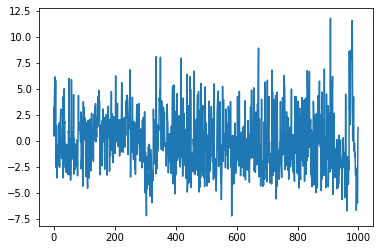

library
cinema, movie theater, movie theatre, movie house, picture palace
gondola
medicine chest, medicine cabinet
pay-phone, pay-station
pop bottle, soda bottle
bookshop, bookstore, bookstall
bookcase
restaurant, eating house, eating place, eatery
vending machine


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


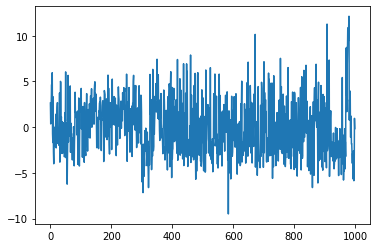

library
cinema, movie theater, movie theatre, movie house, picture palace
bookcase
bookshop, bookstore, bookstall
vending machine
medicine chest, medicine cabinet
barbershop
desk
container ship, containership, container vessel
gas pump, gasoline pump, petrol pump, island dispenser


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


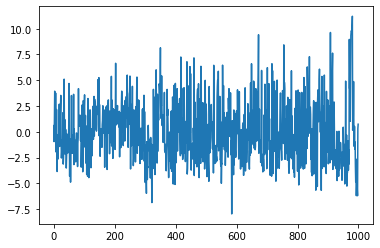

bookcase
library
monitor
medicine chest, medicine cabinet
desktop computer
screen, CRT screen
desk
rocking chair, rocker
bookshop, bookstore, bookstall
home theater, home theatre


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


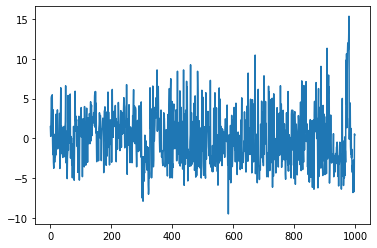

cinema, movie theater, movie theatre, movie house, picture palace
library
bookcase
medicine chest, medicine cabinet
marimba, xylophone
bookshop, bookstore, bookstall
dumbbell
gondola
screwdriver
accordion, piano accordion, squeeze box


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


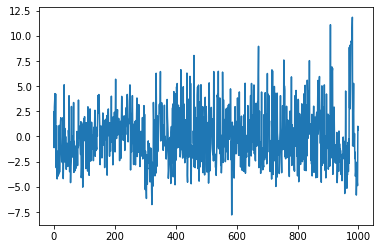

barbershop
swimming trunks, bathing trunks
ice lolly, lolly, lollipop, popsicle
harmonica, mouth organ, harp, mouth harp
Mexican hairless
neck brace
Italian greyhound
malinois
bull mastiff
standard poodle


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


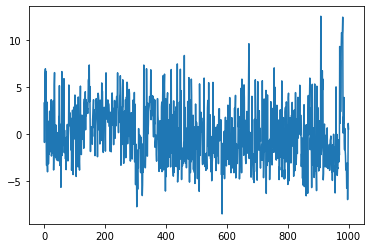

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


medicine chest, medicine cabinet
sunscreen, sunblock, sun blocker
library
barbershop
pop bottle, soda bottle
beer bottle
coffee mug
water bottle
lotion
dumbbell
(480, 640, 3)


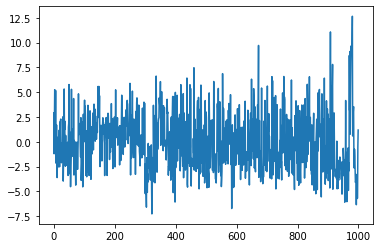

library
marimba, xylophone
desktop computer
medicine chest, medicine cabinet
screwdriver
pop bottle, soda bottle
television, television system
hair spray
bookcase
sunscreen, sunblock, sun blocker


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


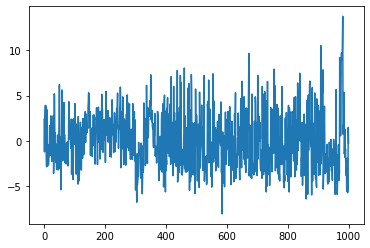

water bottle
pop bottle, soda bottle
accordion, piano accordion, squeeze box
marimba, xylophone
cinema, movie theater, movie theatre, movie house, picture palace
limousine, limo
sunscreen, sunblock, sun blocker
library
bookcase
bookshop, bookstore, bookstall


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


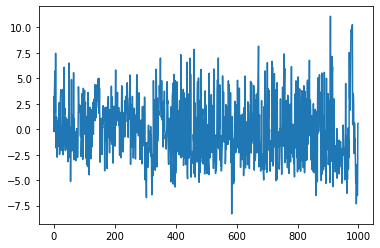

pop bottle, soda bottle
water bottle
medicine chest, medicine cabinet
dumbbell
library
vending machine
cellular telephone, cellular phone, cellphone, cell, mobile phone
paintbrush
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
lab coat, laboratory coat


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


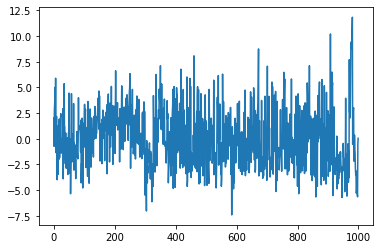

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


lab coat, laboratory coat
vending machine
neck brace
dumbbell
barbershop
library
medicine chest, medicine cabinet
jersey, T-shirt, tee shirt
bookshop, bookstore, bookstall
television, television system
(480, 640, 3)


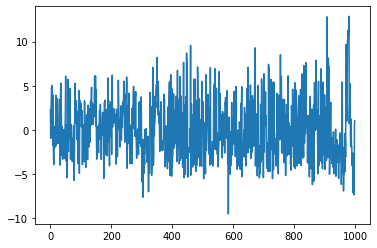

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


jersey, T-shirt, tee shirt
marimba, xylophone
sewing machine
punching bag, punch bag, punching ball, punchball
Old English sheepdog, bobtail
barbershop
lab coat, laboratory coat
laptop, laptop computer
paper towel
toy poodle
(480, 640, 3)


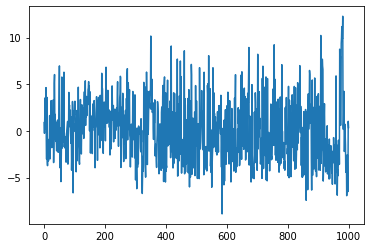

<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


butcher shop, meat market
barbershop
library
bookshop, bookstore, bookstall
container ship, containership, container vessel
medicine chest, medicine cabinet
laptop, laptop computer
television, television system
grocery store, grocery, food market, market
cinema, movie theater, movie theatre, movie house, picture palace
(480, 640, 3)


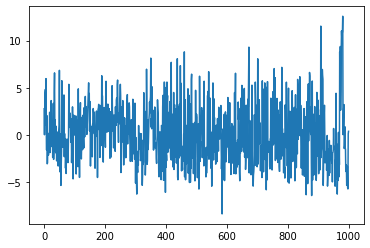

medicine chest, medicine cabinet
desktop computer
bookcase
sunscreen, sunblock, sun blocker
bookshop, bookstore, bookstall
library
hair spray
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
refrigerator, icebox
lotion


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


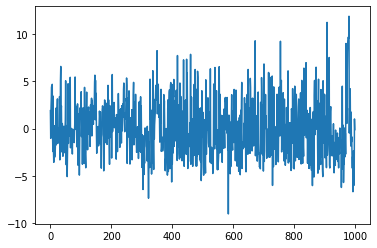

medicine chest, medicine cabinet
jersey, T-shirt, tee shirt
desktop computer
television, television system
cellular telephone, cellular phone, cellphone, cell, mobile phone
lotion
jigsaw puzzle
laptop, laptop computer
dumbbell
hair spray


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


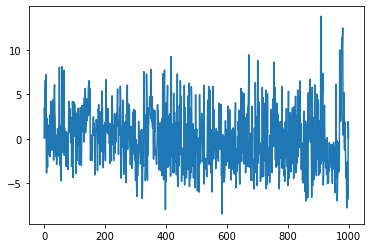

marimba, xylophone
bookshop, bookstore, bookstall
laptop, laptop computer
accordion, piano accordion, squeeze box
pay-phone, pay-station
tray
power drill
ice lolly, lolly, lollipop, popsicle
barbershop
jigsaw puzzle


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


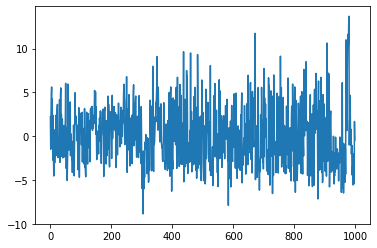

television, television system
marimba, xylophone
desktop computer
stage
accordion, piano accordion, squeeze box
mortarboard
laptop, laptop computer
monitor
barbershop
desk


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


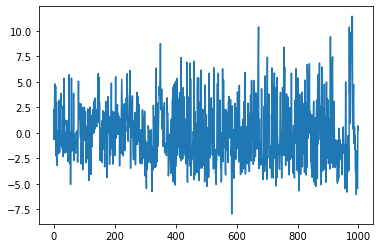

barbershop
vending machine
jigsaw puzzle
marimba, xylophone
hair spray
comic book
military uniform
water bottle
library
bookshop, bookstore, bookstall


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


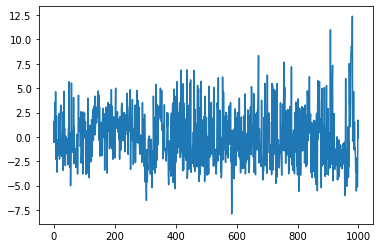

marimba, xylophone
oxygen mask
barbershop
dumbbell
spatula
neck brace
jigsaw puzzle
butcher shop, meat market
Kerry blue terrier
cellular telephone, cellular phone, cellphone, cell, mobile phone


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


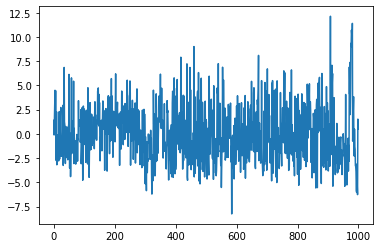

barbershop
dumbbell
barbell
neck brace
hair spray
cellular telephone, cellular phone, cellphone, cell, mobile phone
oxygen mask
laptop, laptop computer
cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM
desktop computer


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


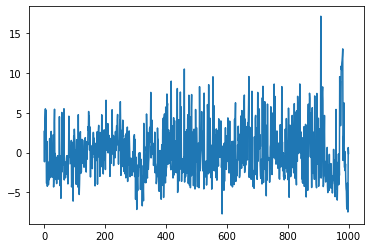

barbershop
water bottle
marimba, xylophone
syringe
hair spray
sunscreen, sunblock, sun blocker
pop bottle, soda bottle
dumbbell
laptop, laptop computer
barber chair


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


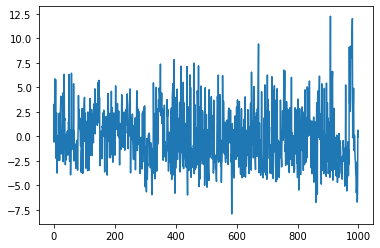

hair spray
barbershop
comic book
sunscreen, sunblock, sun blocker
jersey, T-shirt, tee shirt
neck brace
jigsaw puzzle
marimba, xylophone
water bottle
medicine chest, medicine cabinet


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


(480, 640, 3)


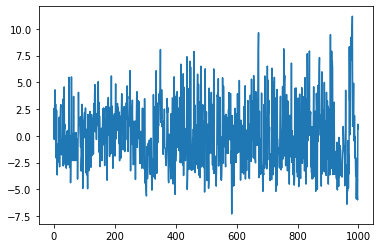

dumbbell
vacuum, vacuum cleaner
barbell
lab coat, laboratory coat
jersey, T-shirt, tee shirt
barbershop
hair spray
gasmask, respirator, gas helmet
face powder
Old English sheepdog, bobtail


<ipython-input-41-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


KeyboardInterrupt: ignored

In [ ]:
video_stream()

while True:
 
    img = photo()

    print(img.shape)
    
    out = net(load_im(im))
    plt.plot(np.arange(1000),out[0].cpu().detach().numpy())
    plt.show()

    inference(img)

In [ ]:
img